In [ ]:
!pip install sdv
import sdv

In [ ]:
import pandas as pd
from sdv.metadata import SingleTableMetadata
data = pd.read_csv('/content/real_train.csv')
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)
python_dict = metadata.to_dict()
metadata.validate()
metadata.validate_data(data=data)

In [ ]:
from sdv.evaluation.single_table import run_diagnostic
syntheticdata = pd.read_csv('/content/synthetic_CTGAN_real_train1.csv')
diagnostic_report = run_diagnostic(
    real_data= data,
    synthetic_data= syntheticdata,
    metadata=metadata)

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 104.53it/s]

Overall Score: 99.99%

Properties:
- Data Validity: 99.99%
- Data Structure: 100.0%


In [ ]:
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality
from sdv.evaluation.single_table import get_column_plot

# 1. perform basic validity checks
diagnostic = run_diagnostic(data, syntheticdata, metadata)

# 2. measure the statistical similarity
quality_report = evaluate_quality(data, syntheticdata, metadata)

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 238.19it/s]

Overall Score: 99.99%

Properties:
- Data Validity: 99.99%
- Data Structure: 100.0%
Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 2145/2145 [06:24<00:00,  5.58it/s]

Overall Score: 92.49%

Properties:
- Column Shapes: 96.13%
- Column Pair Trends: 88.86%


In [ ]:
quality_report.get_details(property_name='Column Shapes')

Column        Metric     Score
0                    careplan_within_24  TVComplement  0.875719
1                       careplan_length  KSComplement  0.741930
2         Pneumococcal conjugate PCV 13  TVComplement  0.989405
3                                   MMR  TVComplement  0.962091
4                                  DTaP  TVComplement  0.999109
..                                  ...           ...       ...
61                             GENDER_F  TVComplement  0.913809
62                             GENDER_M  TVComplement  0.975171
63  encounter_type_emergency room visit  TVComplement  0.994058
64             encounter_type_inpatient  TVComplement  0.868220
65            encounter_type_outpatient  TVComplement  0.755663

[66 rows x 3 columns]

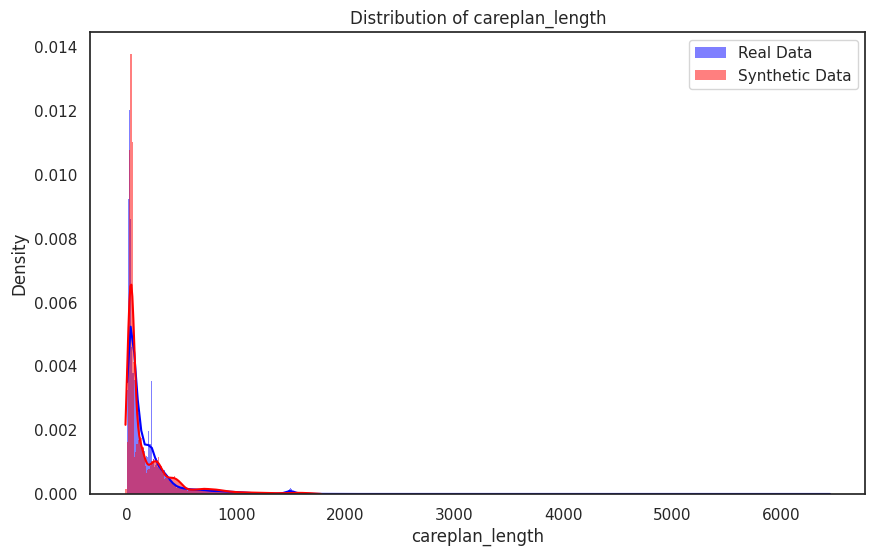

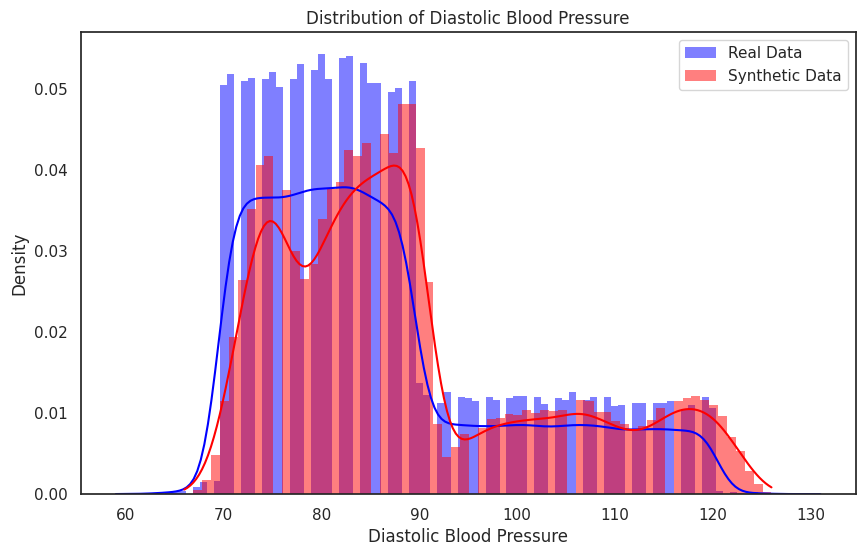

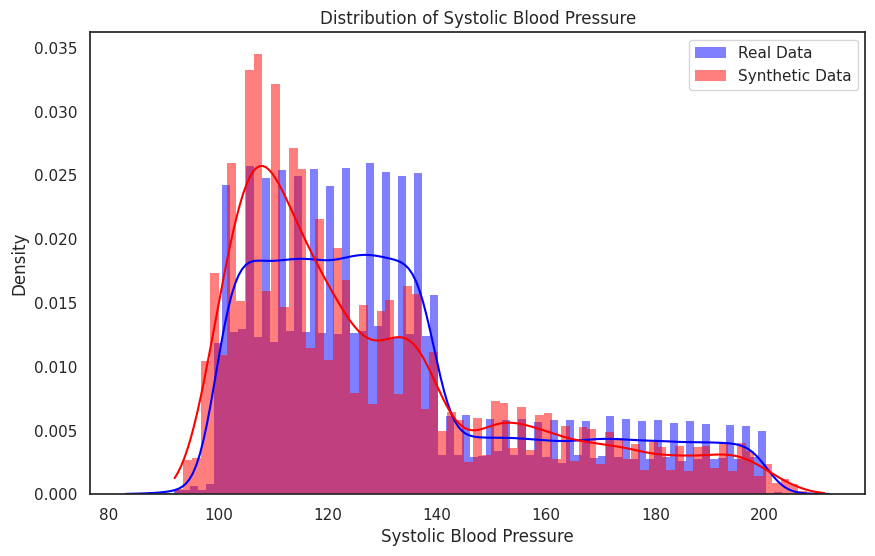

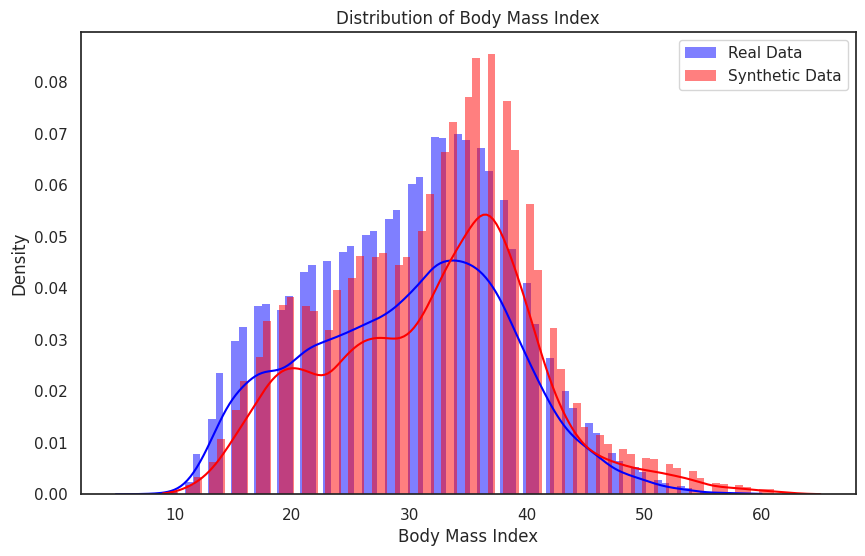

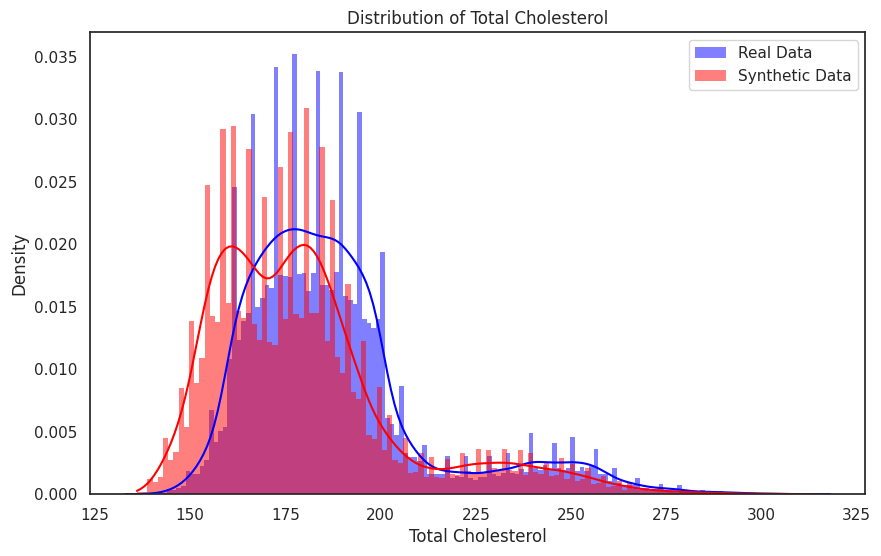

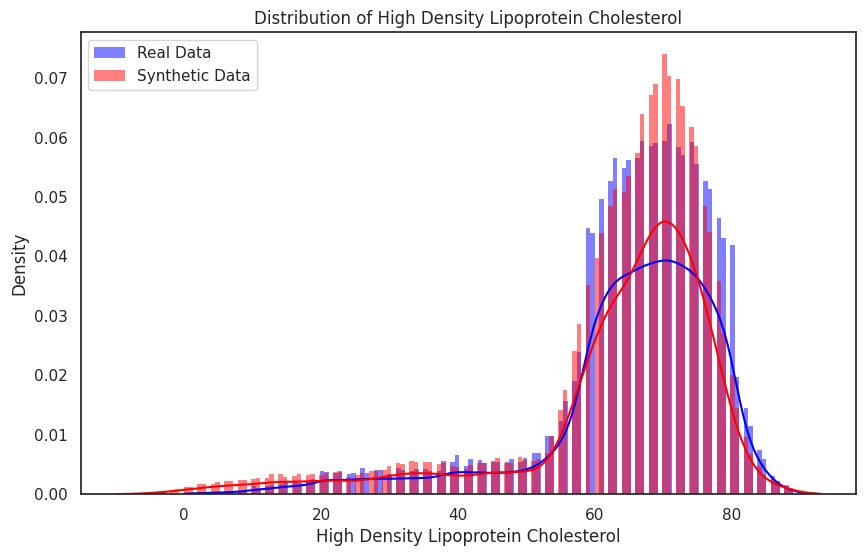

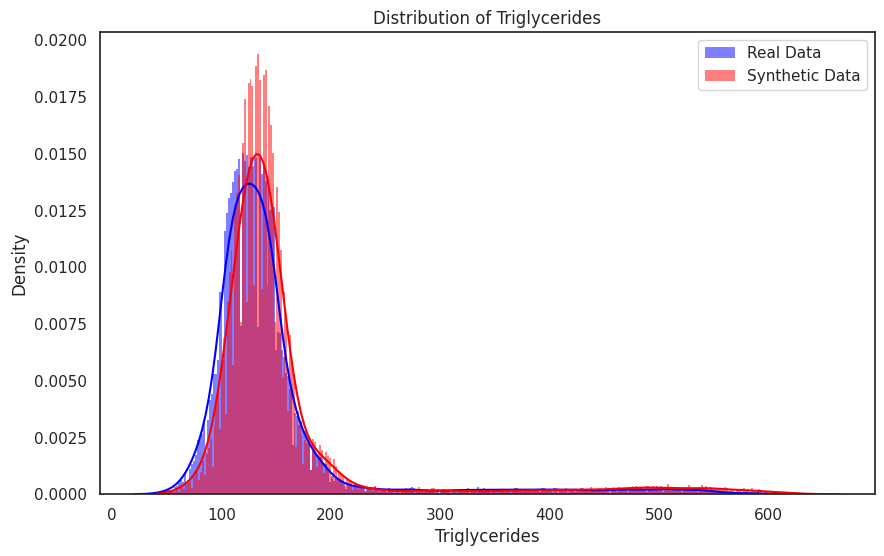

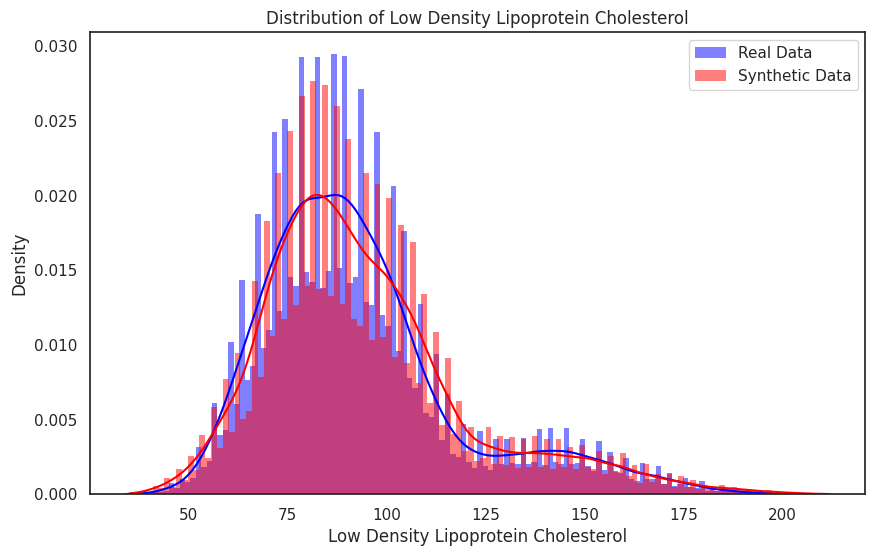

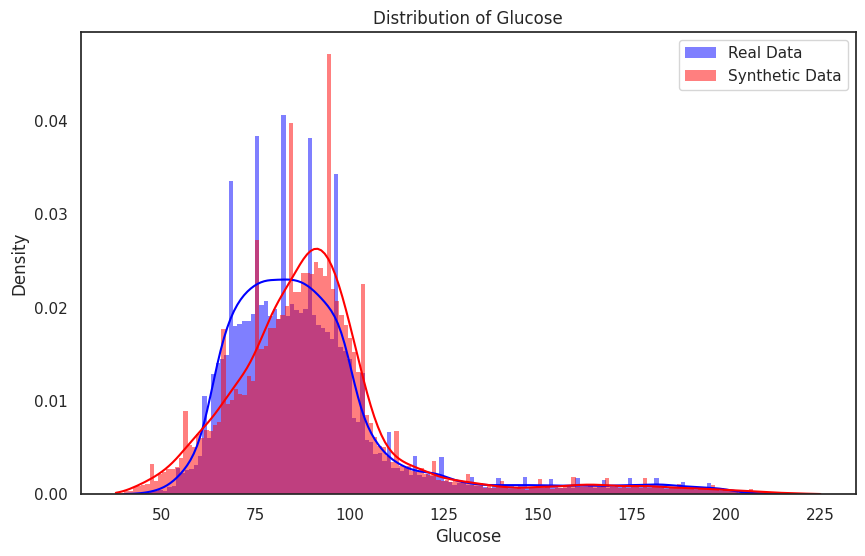

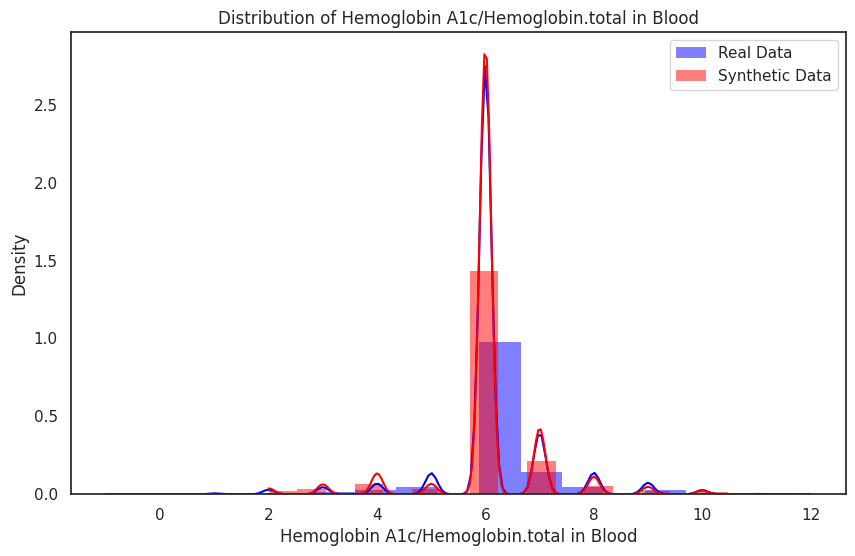

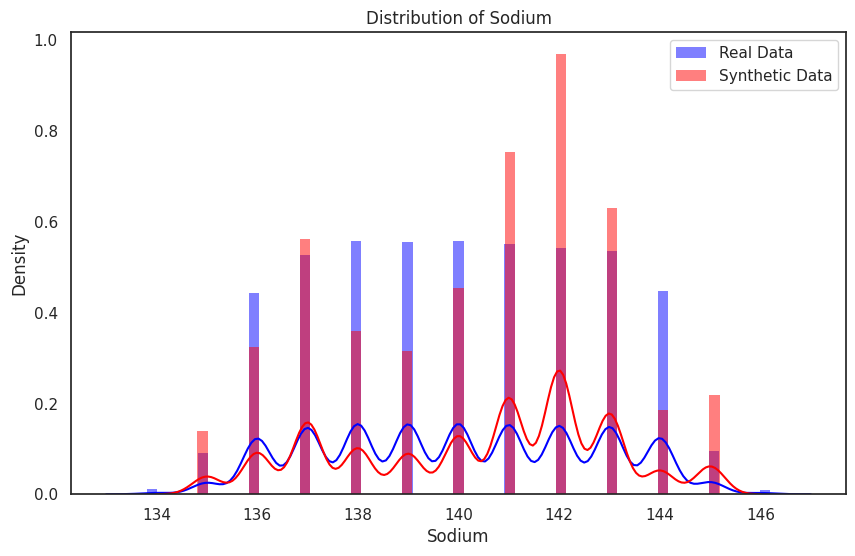

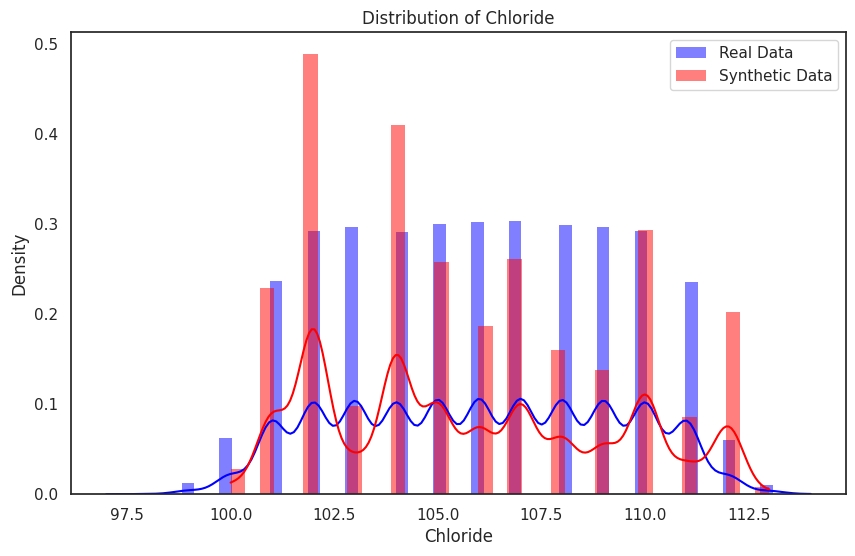

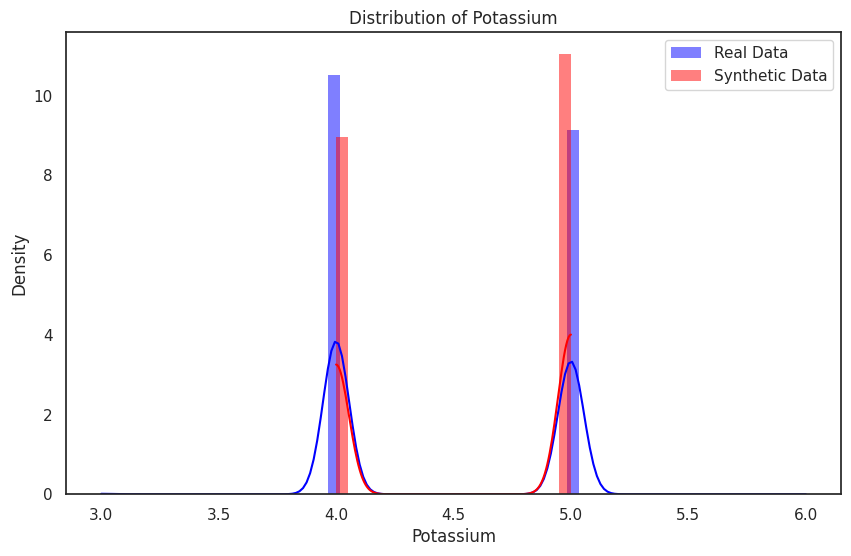

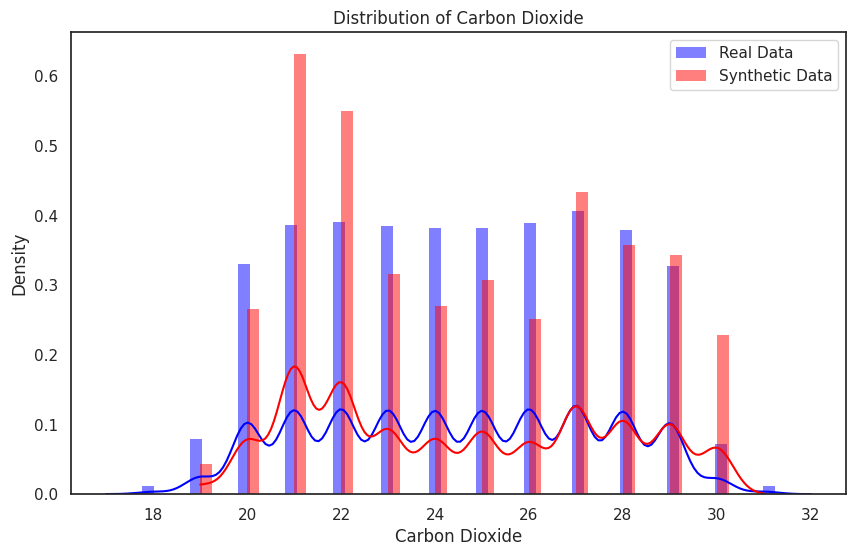

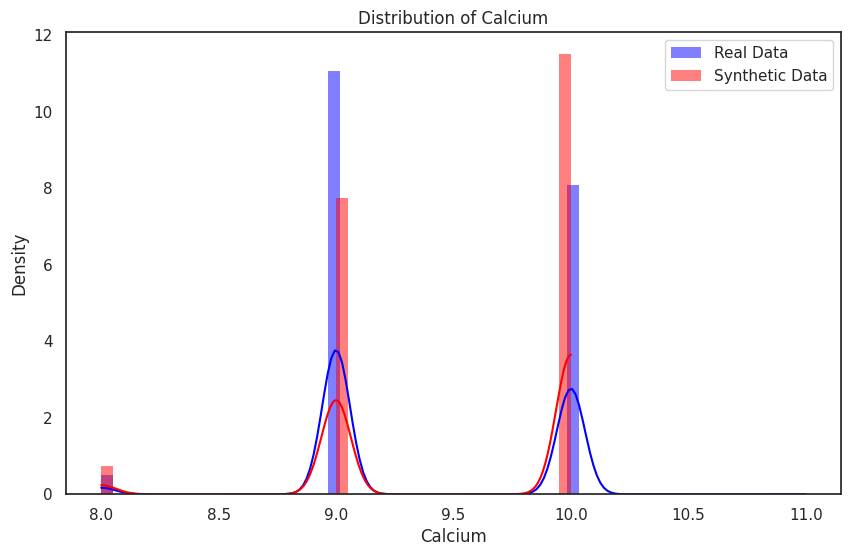

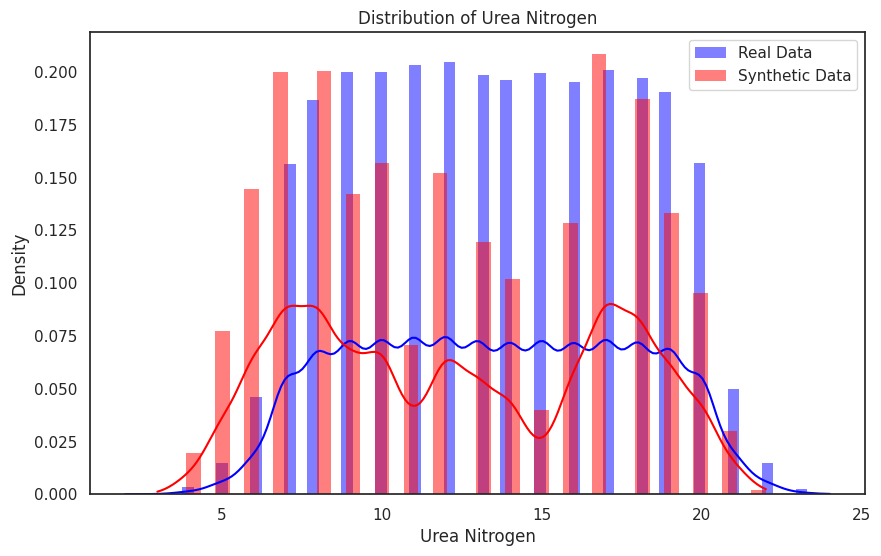

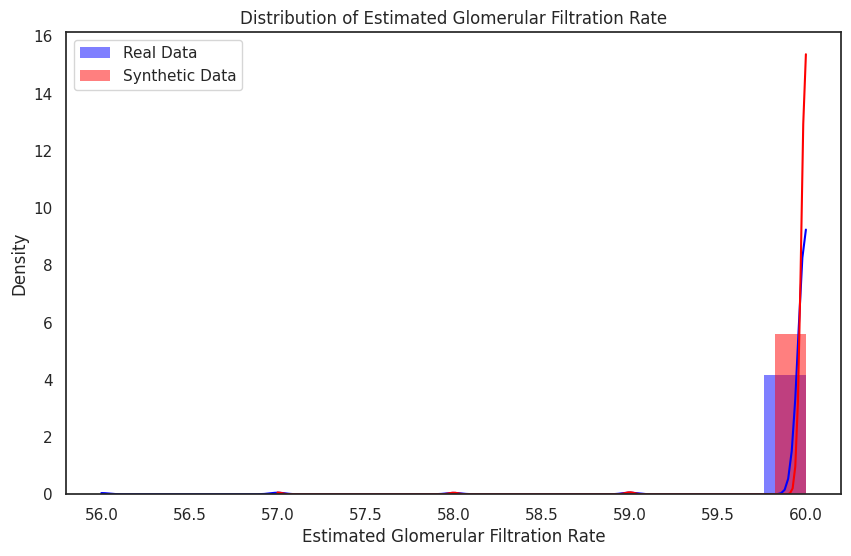

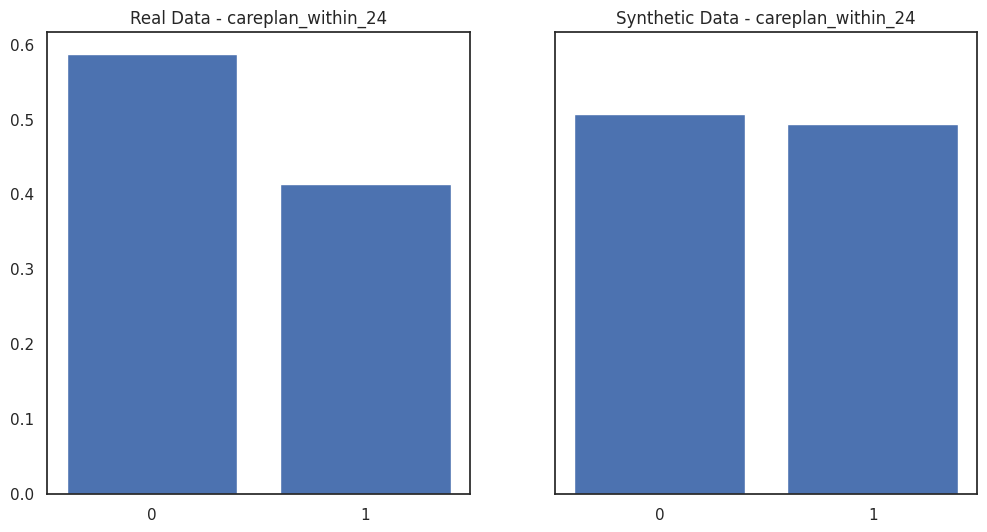

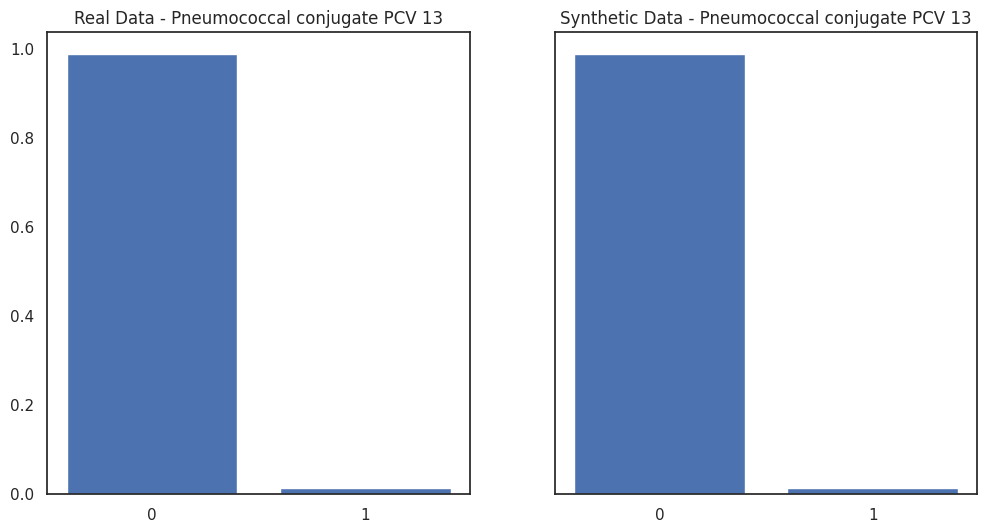

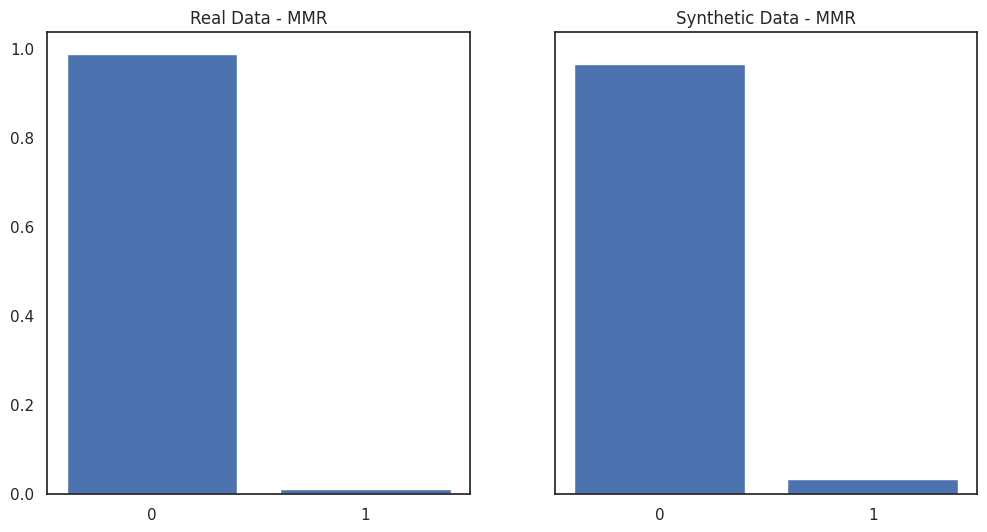

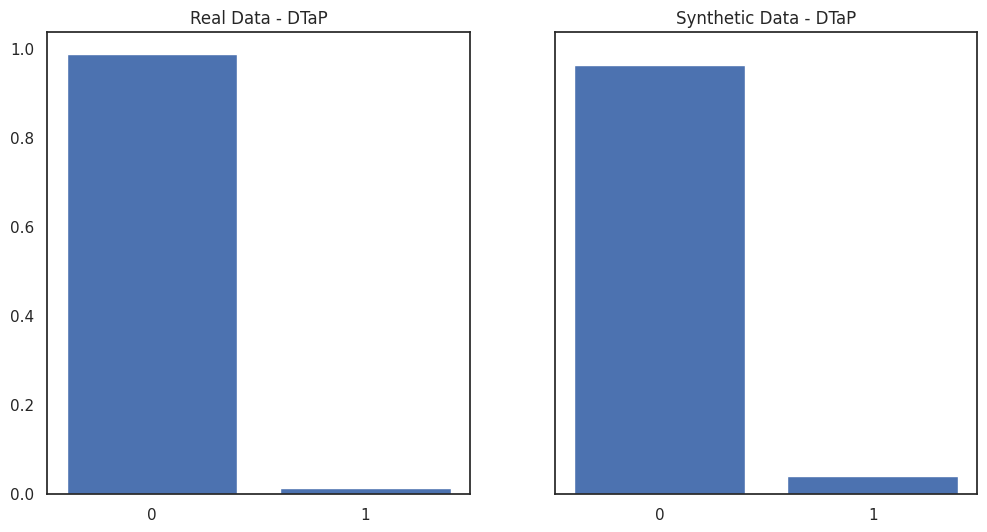

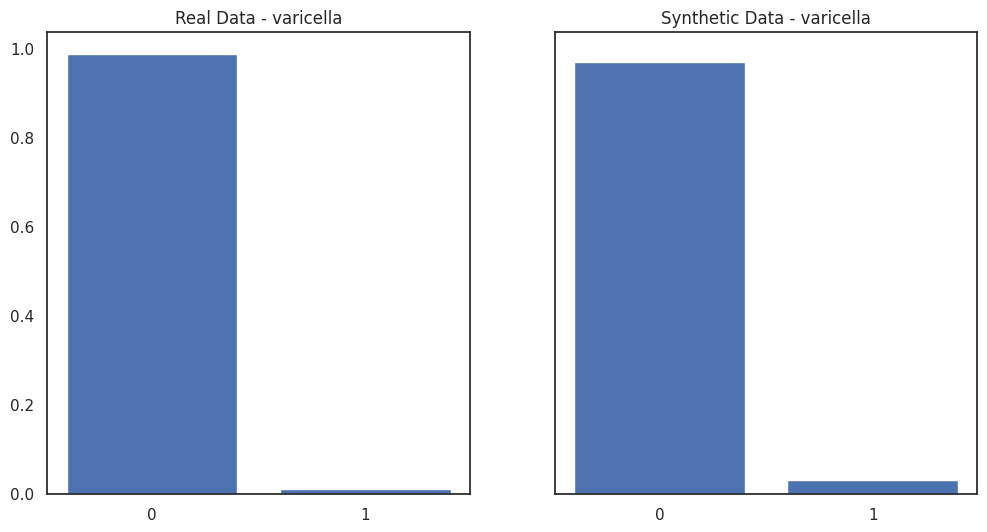

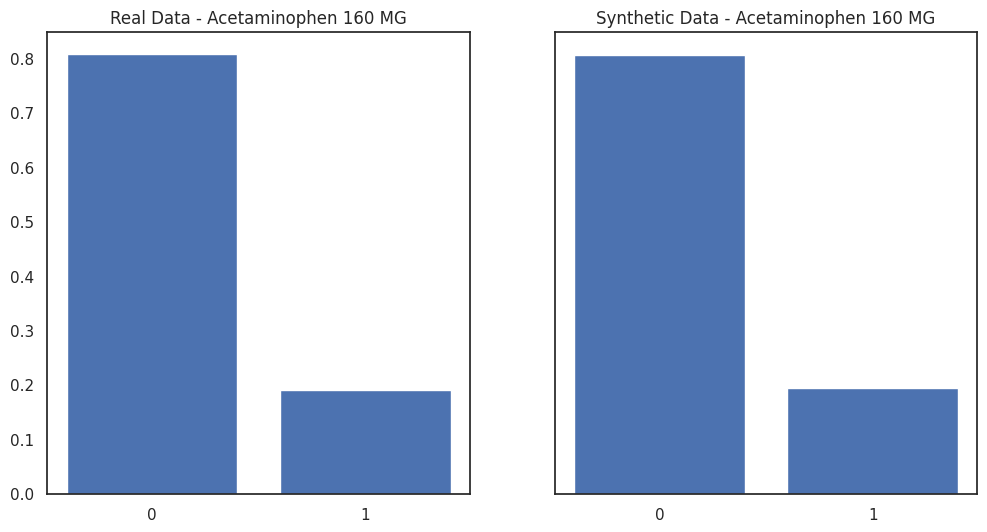

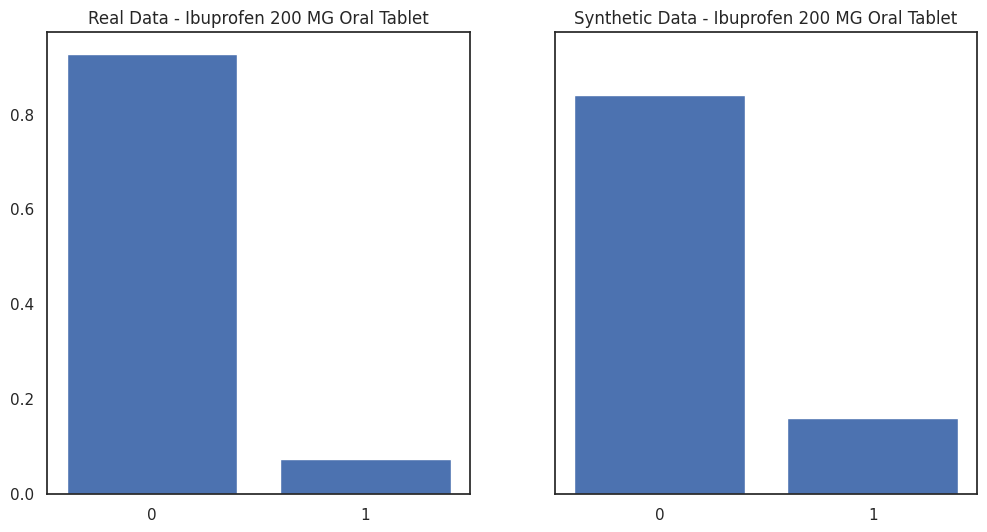

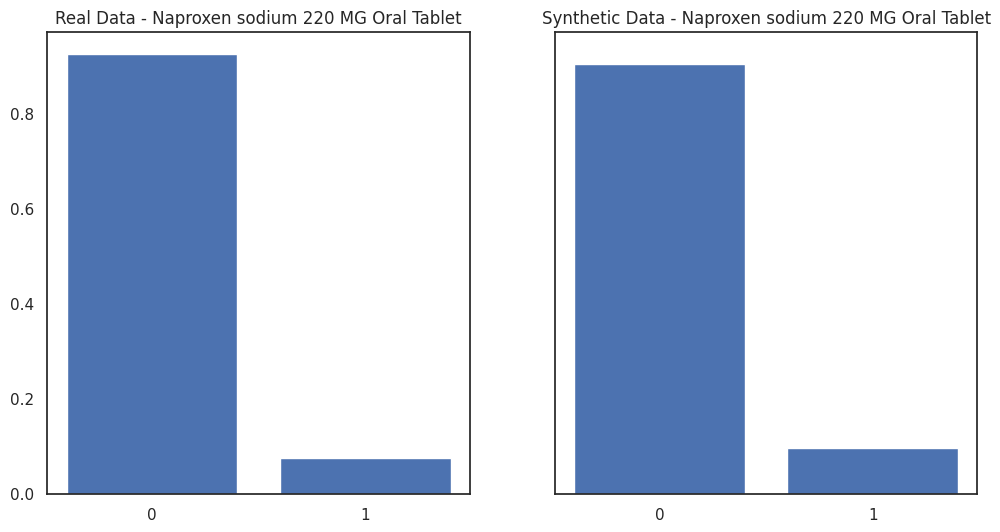

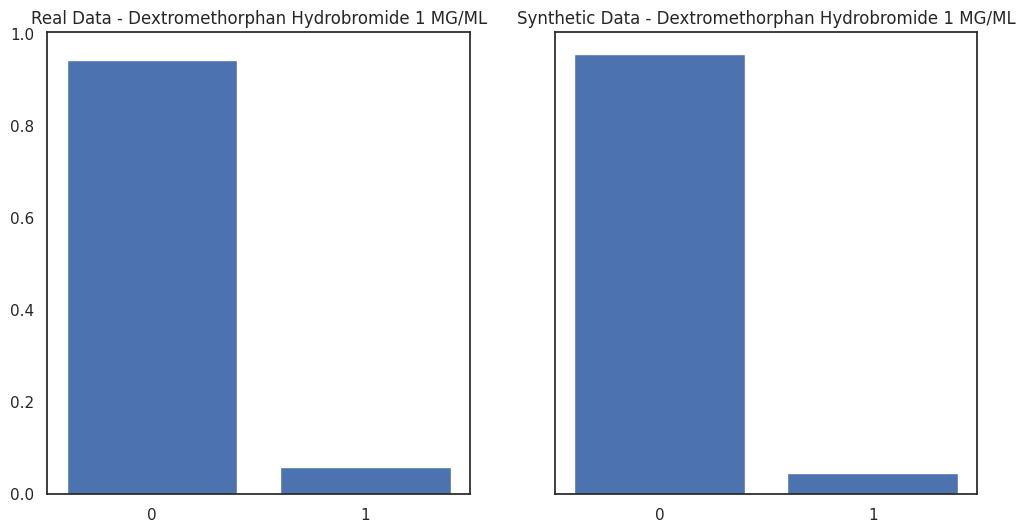

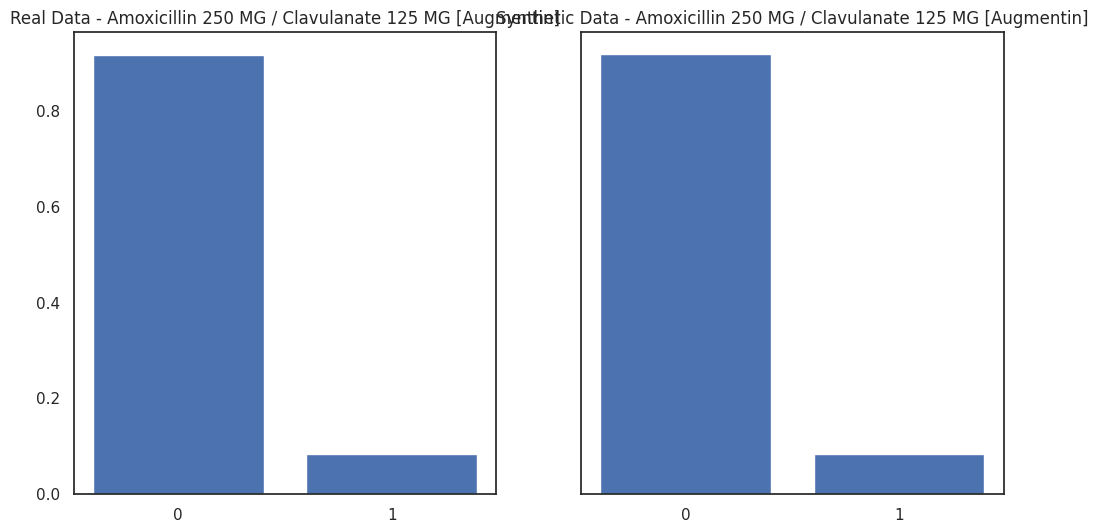

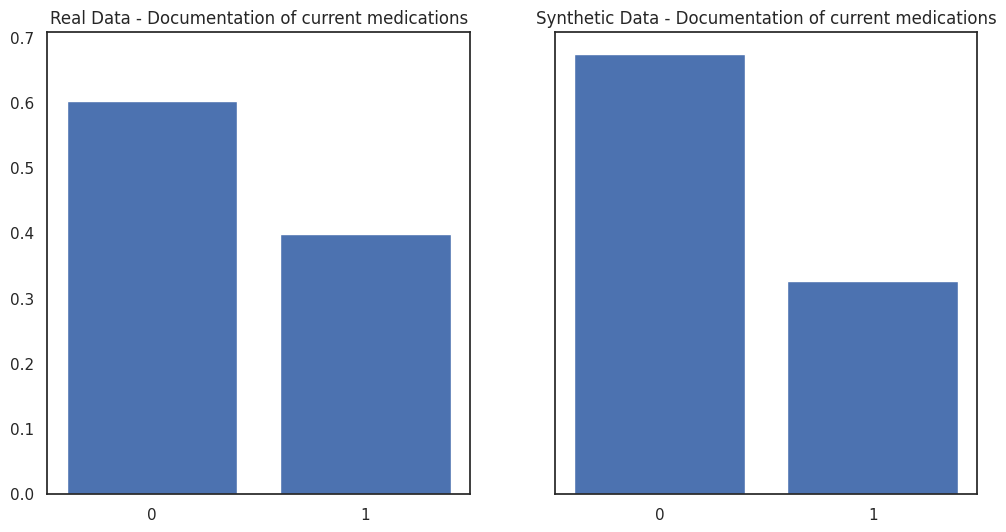

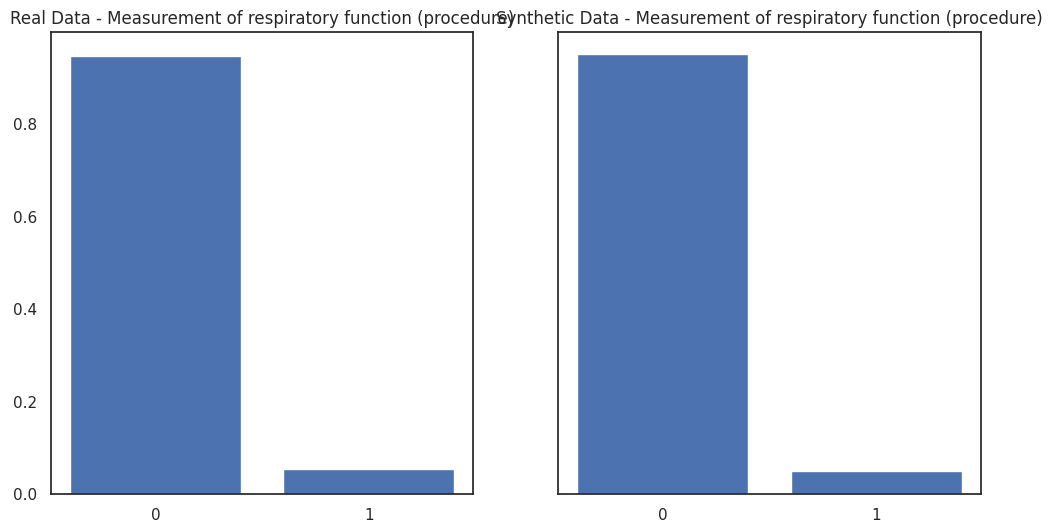

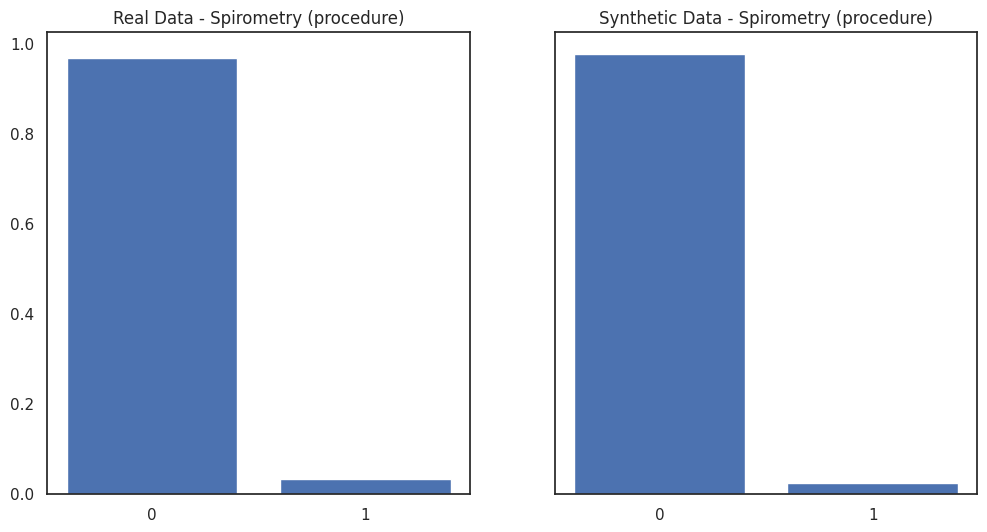

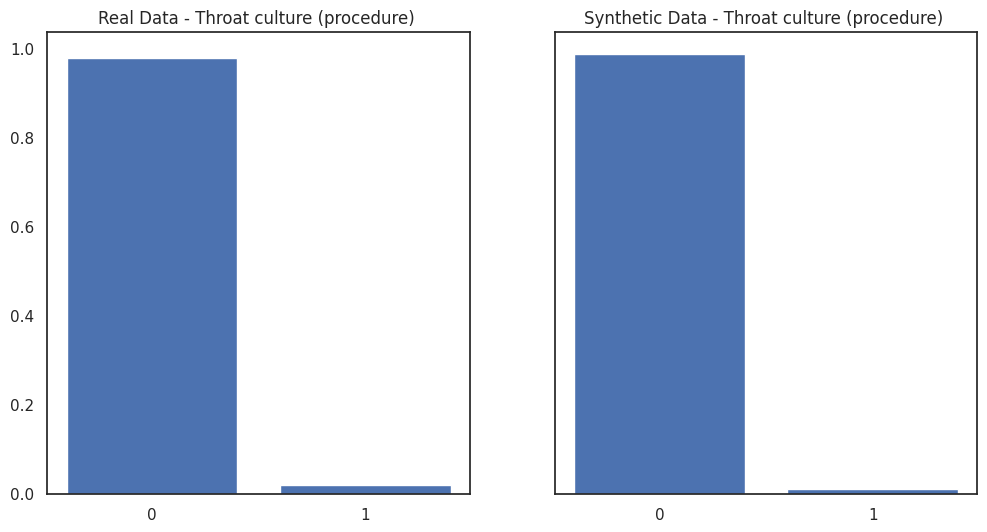

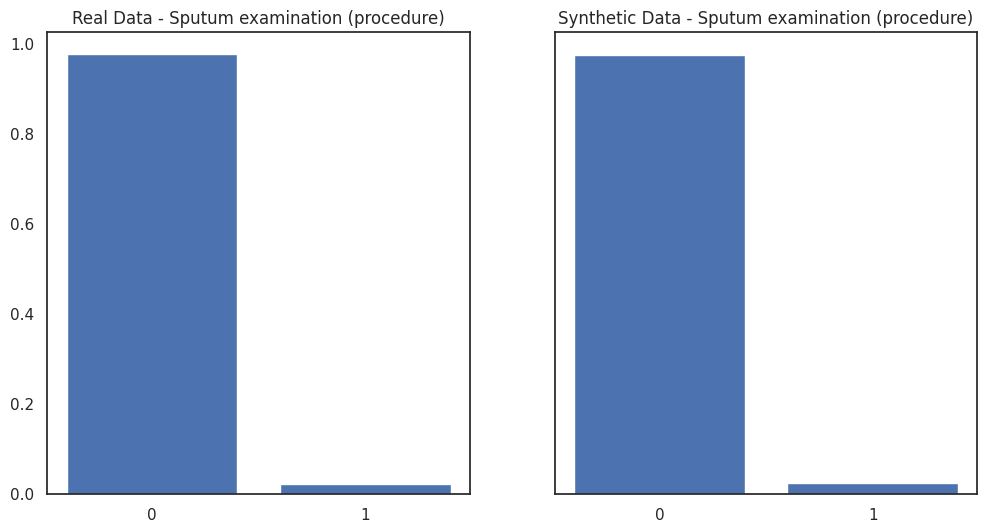

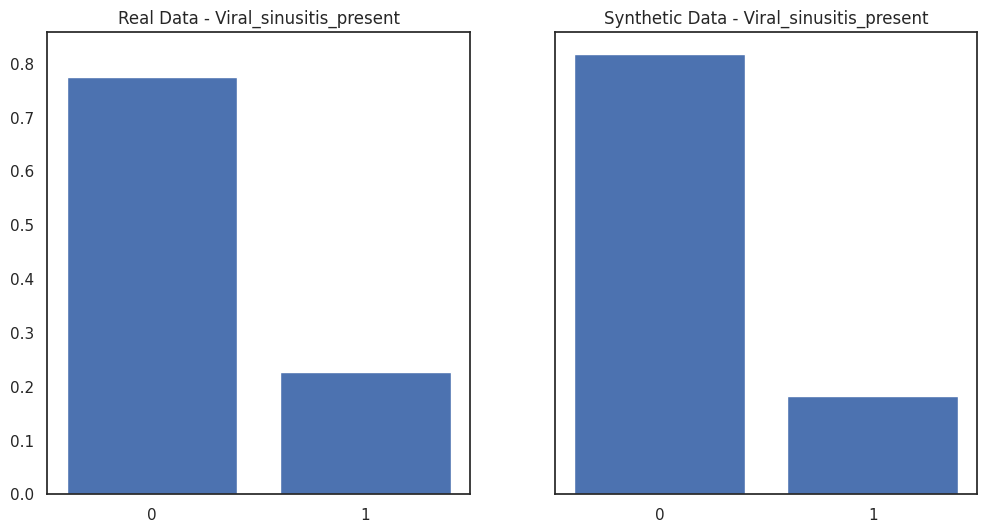

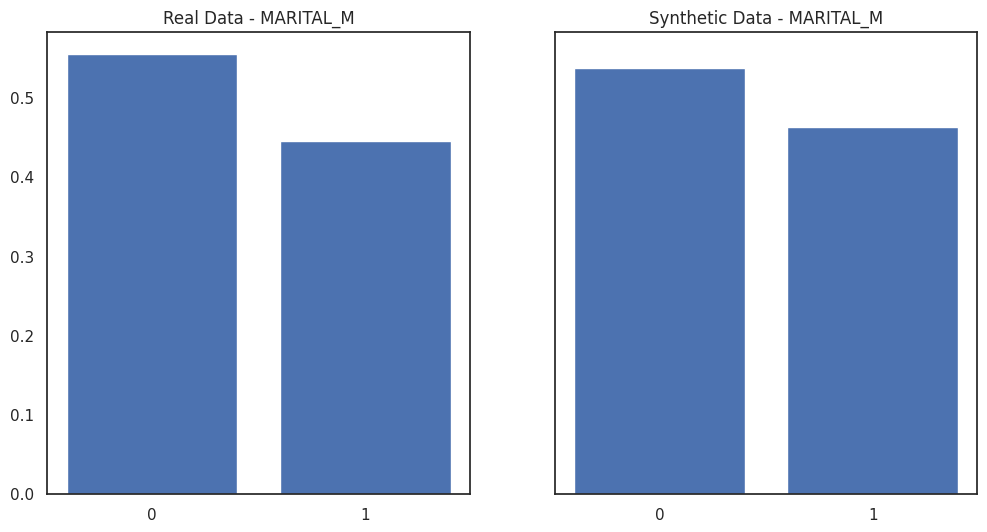

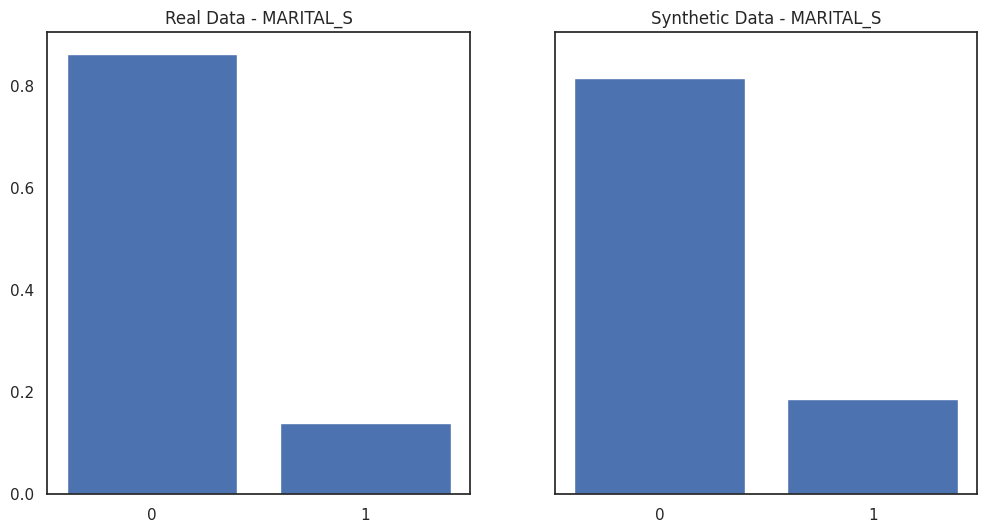

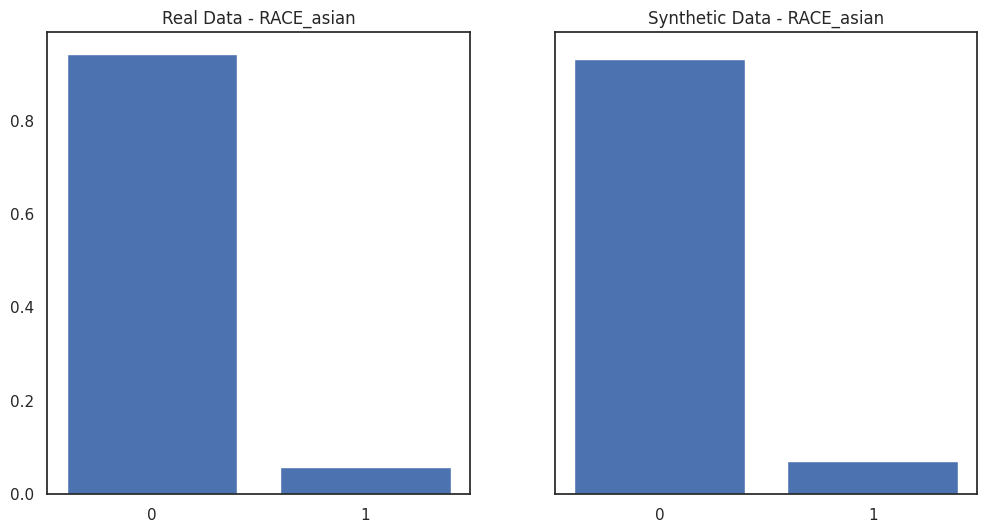

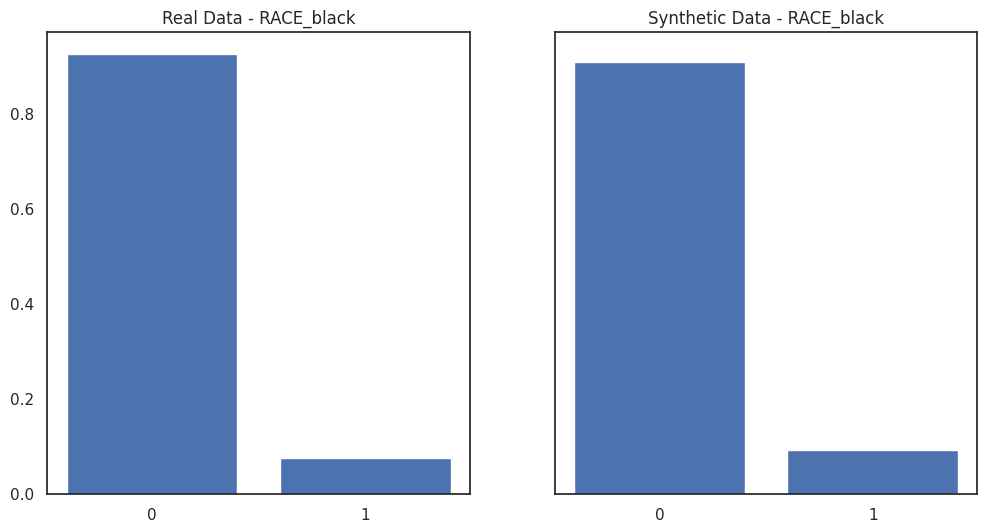

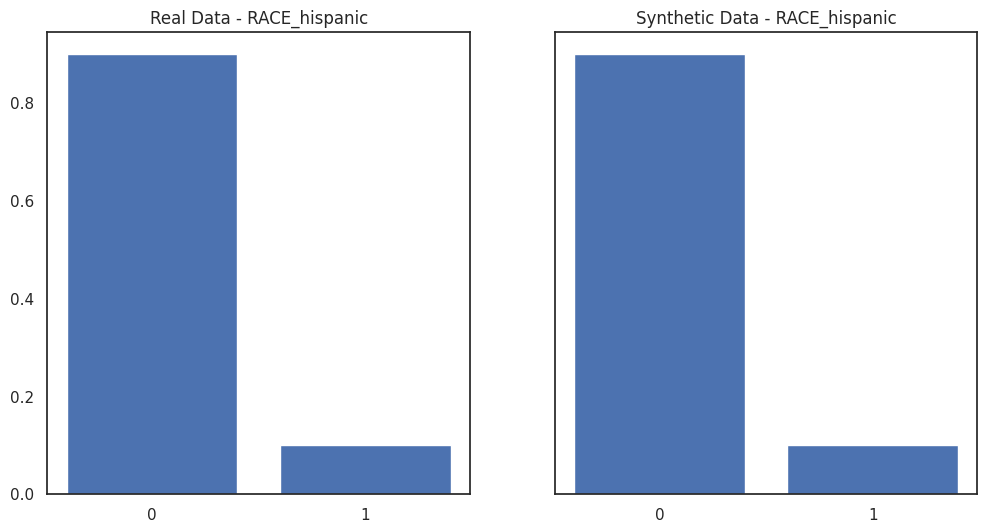

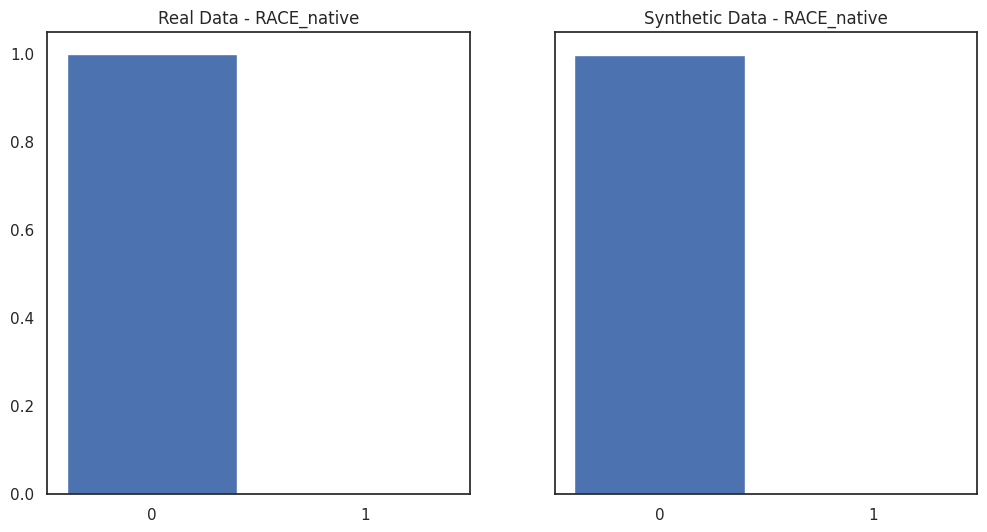

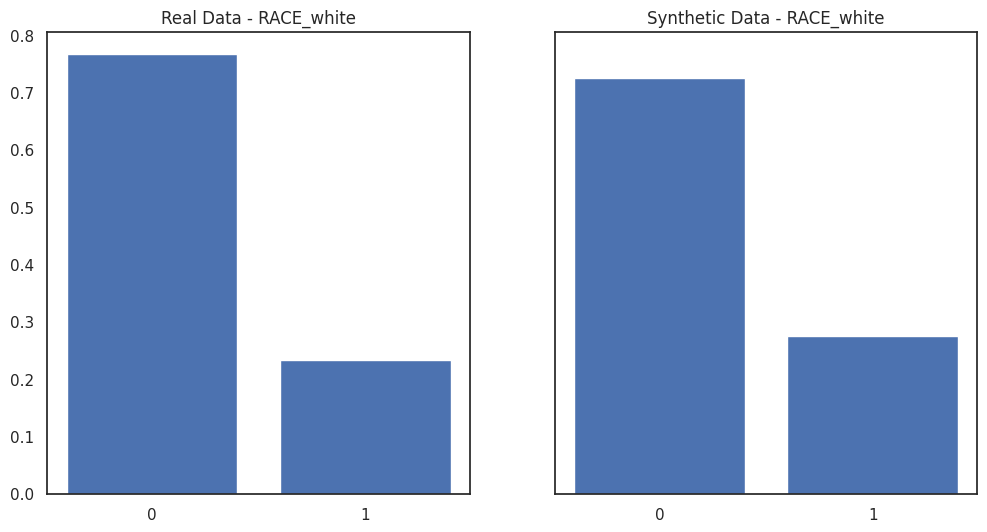

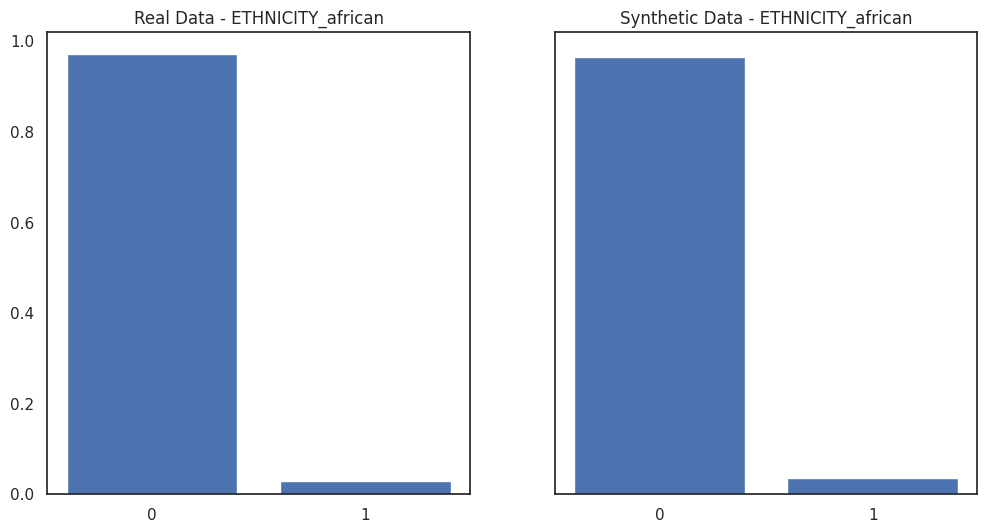

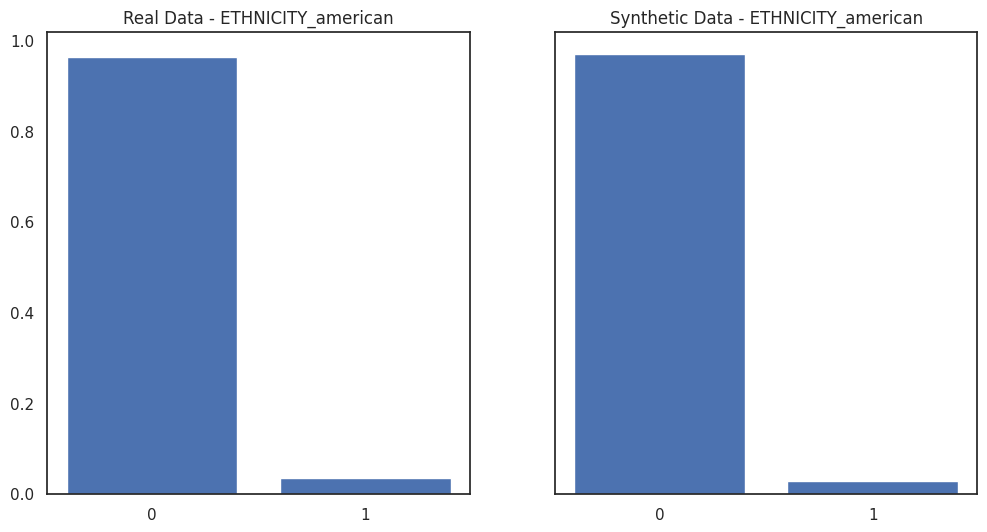

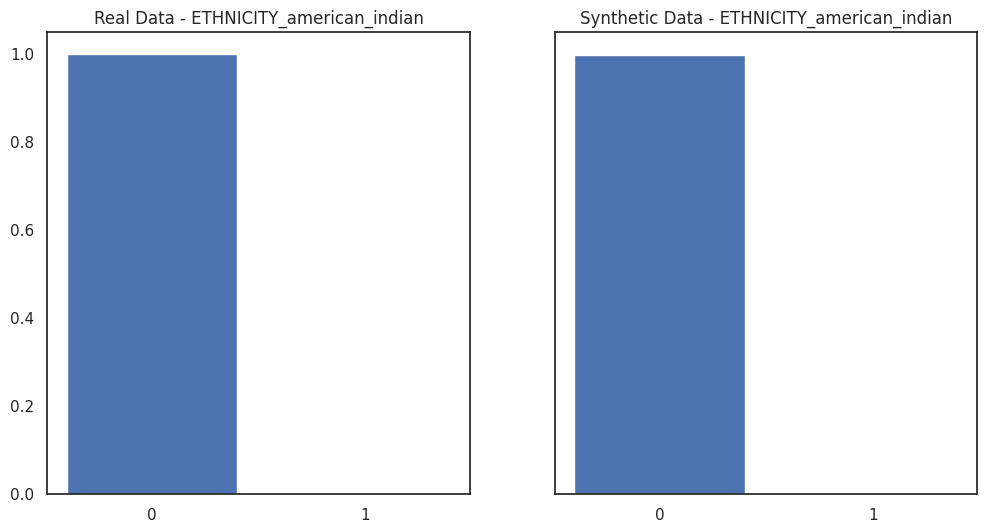

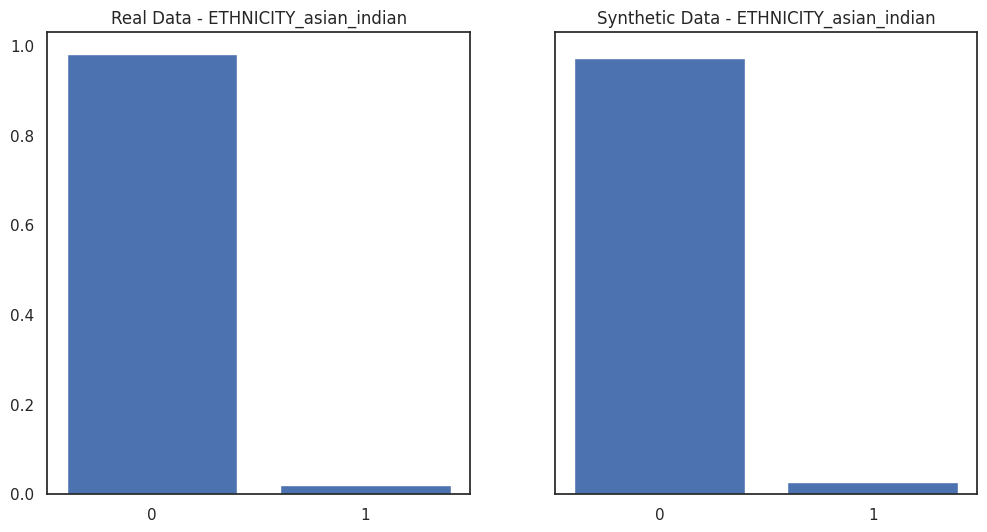

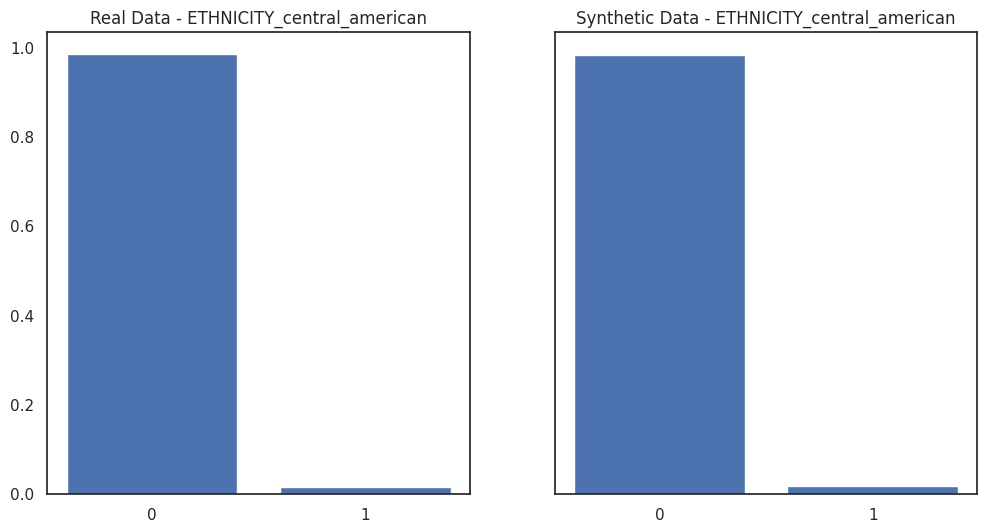

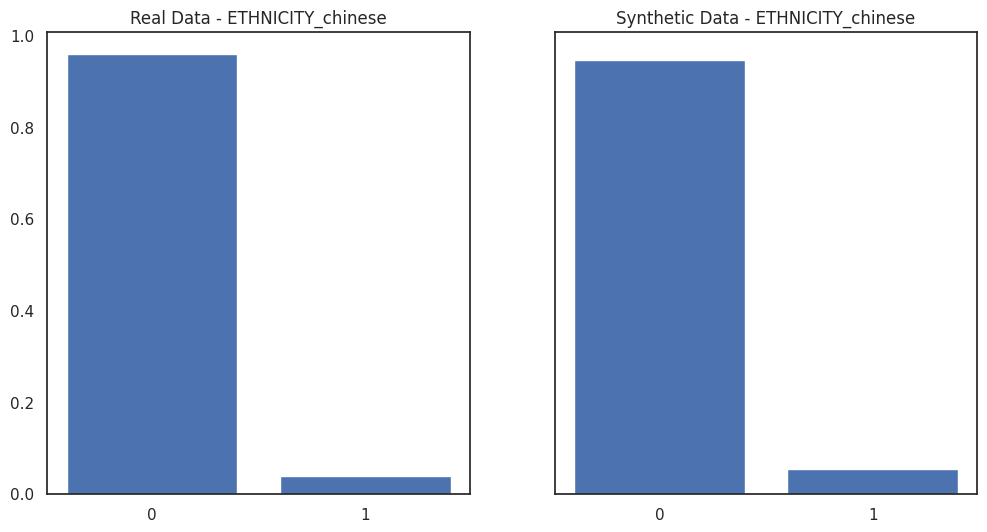

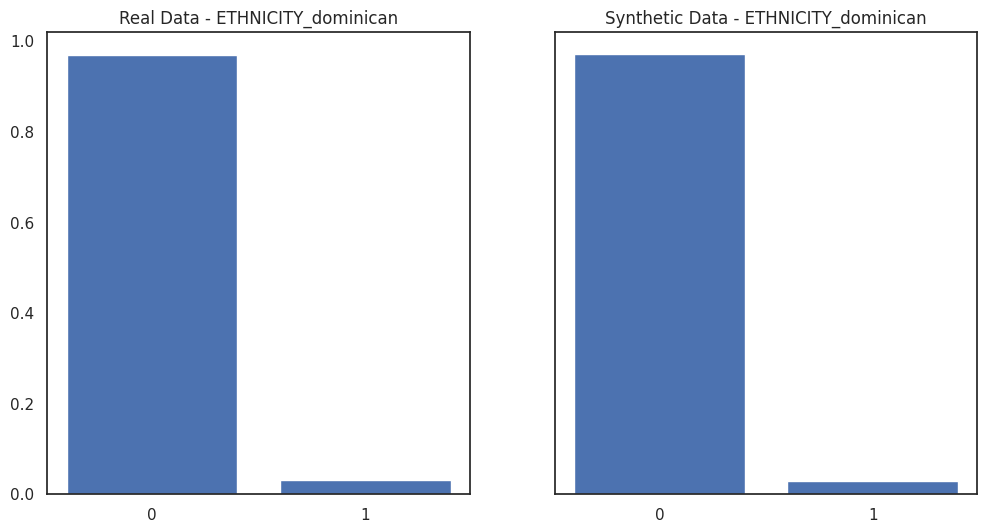

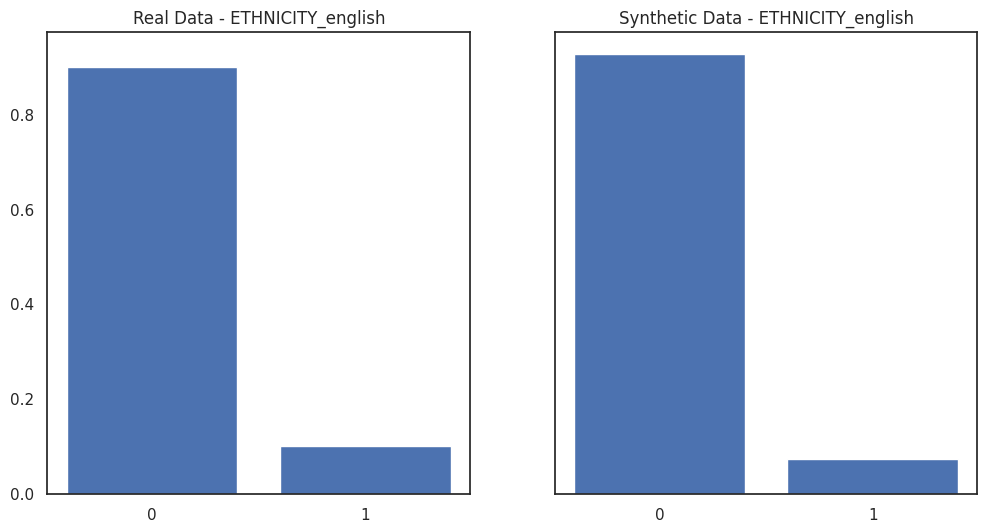

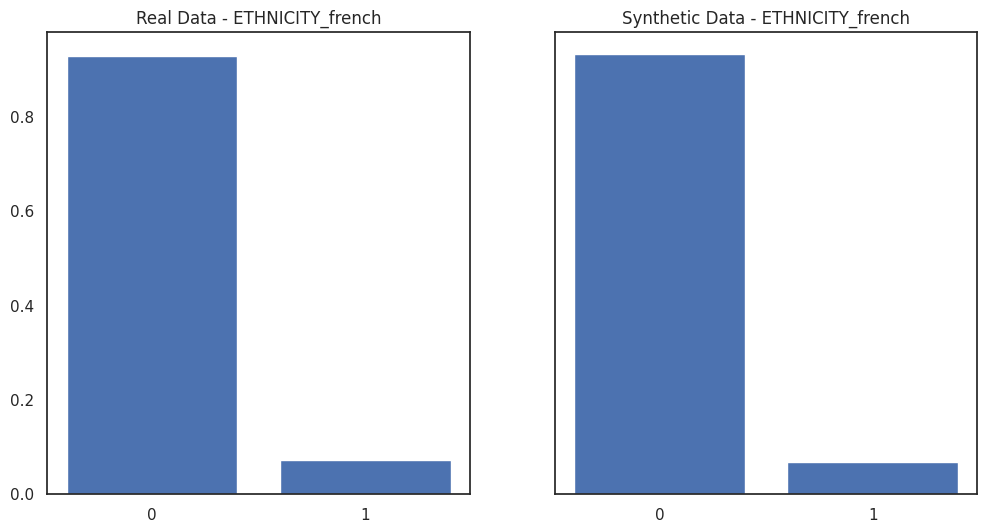

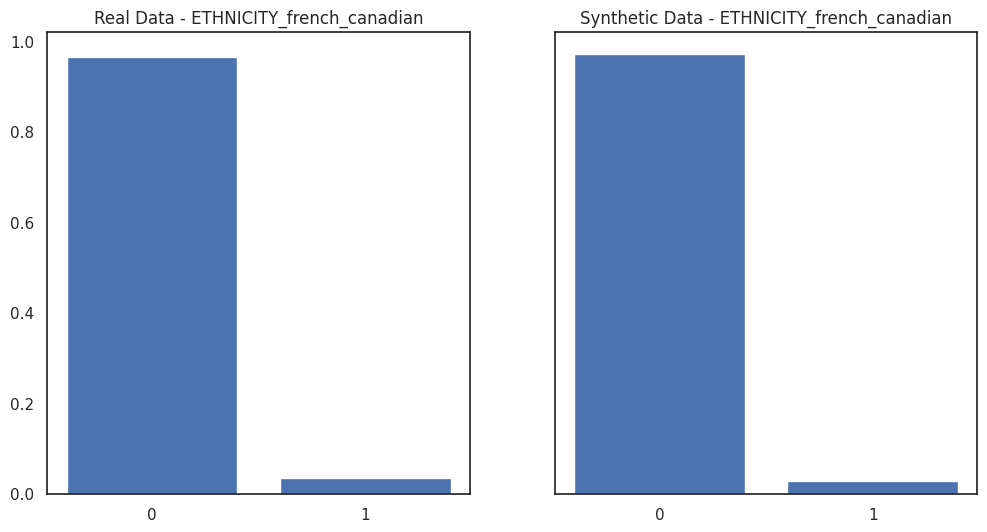

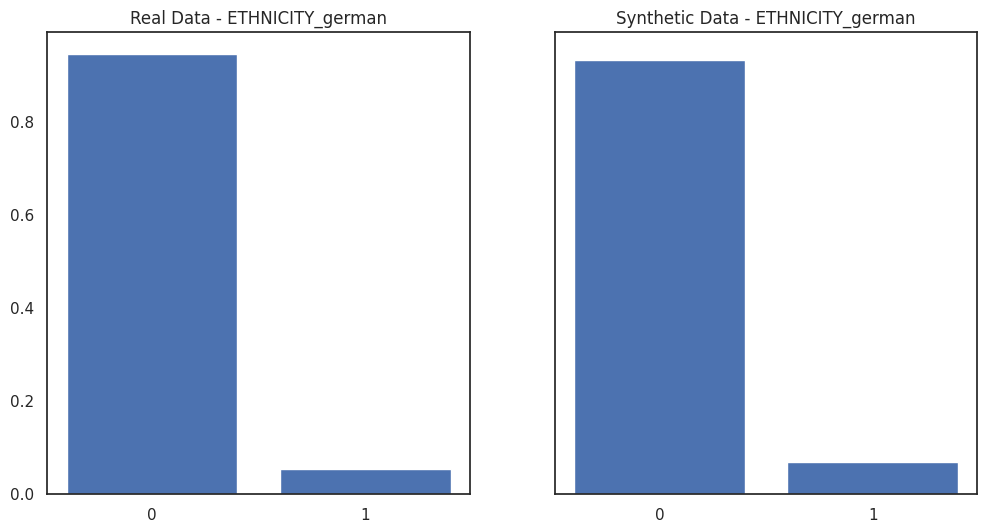

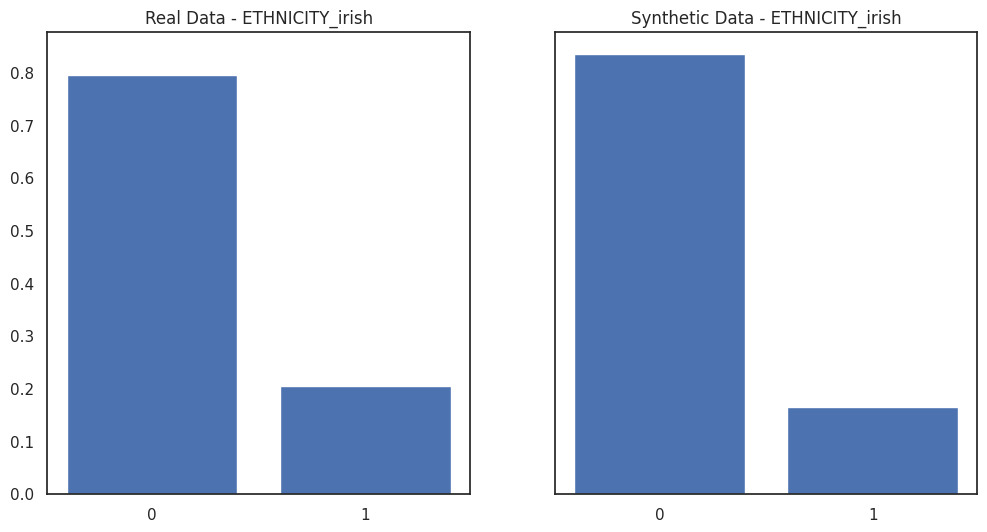

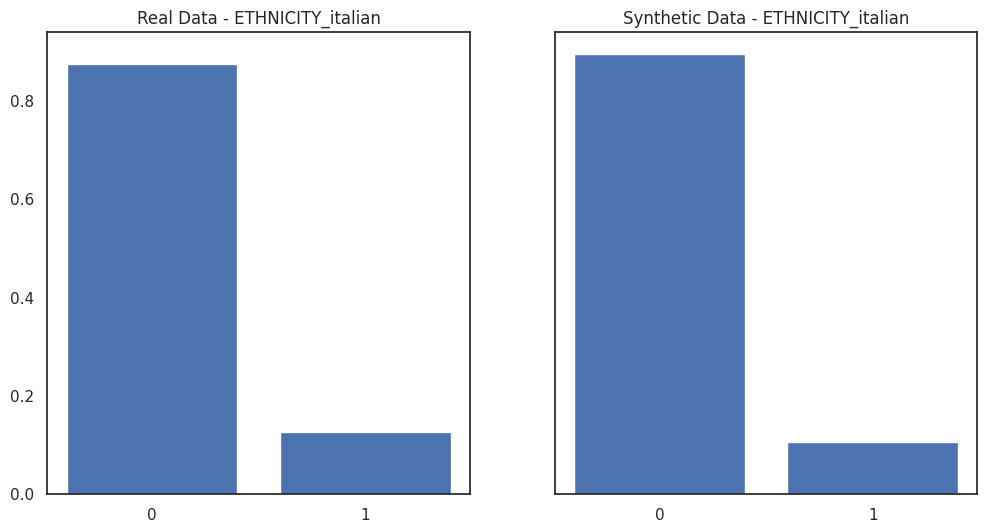

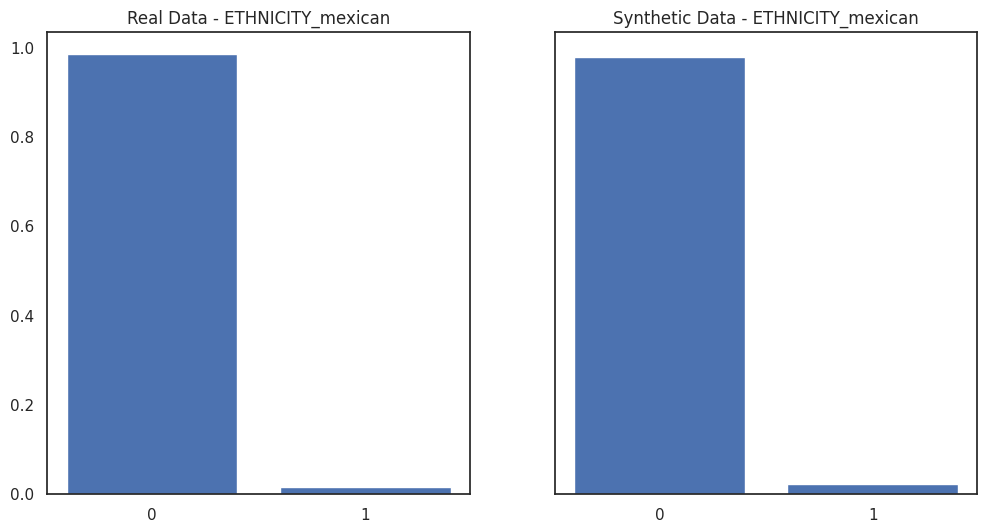

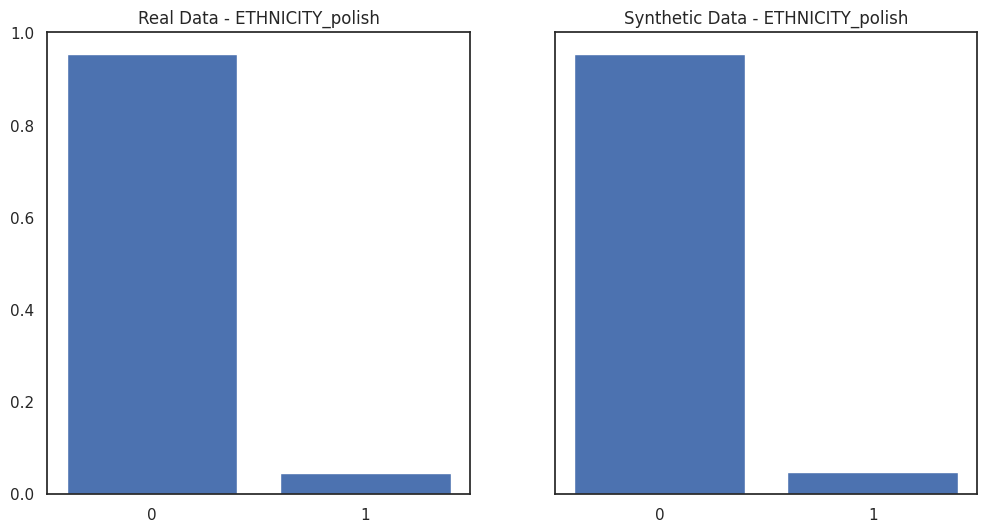

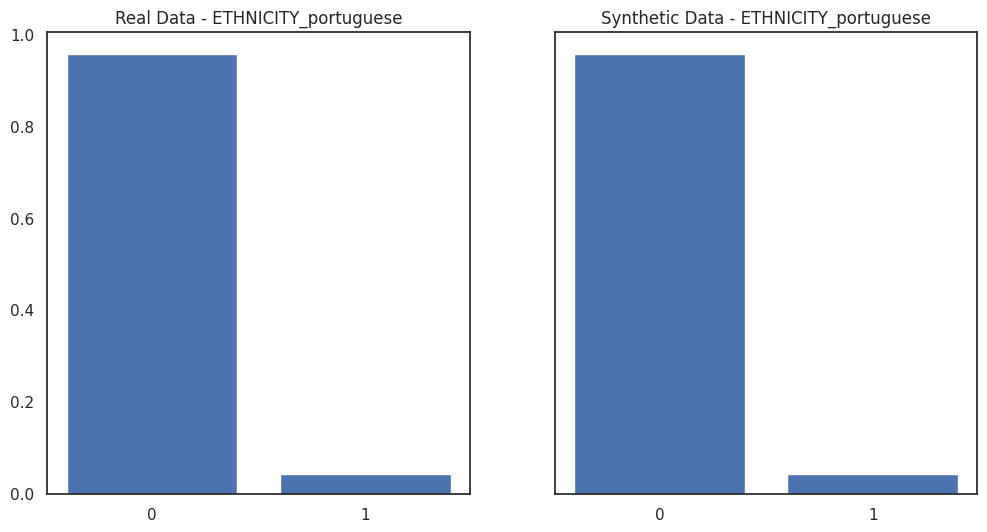

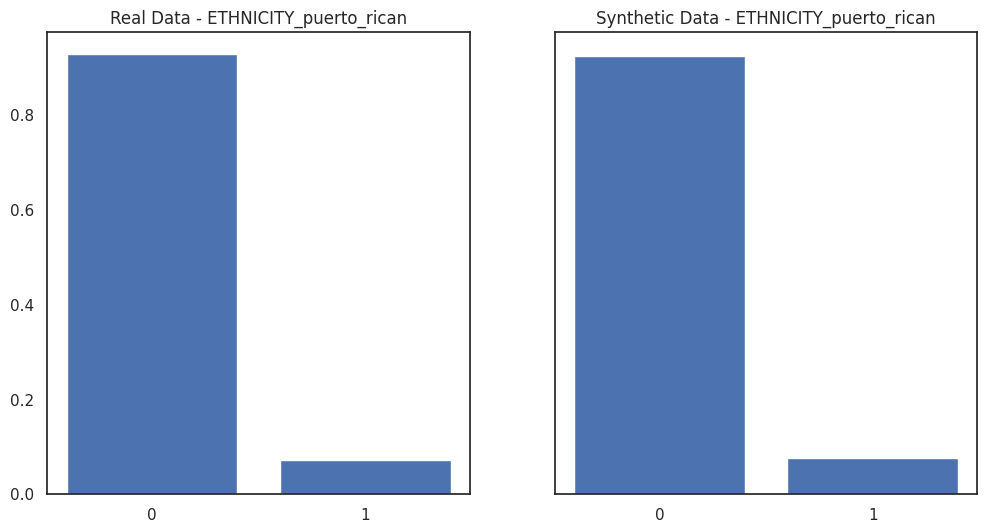

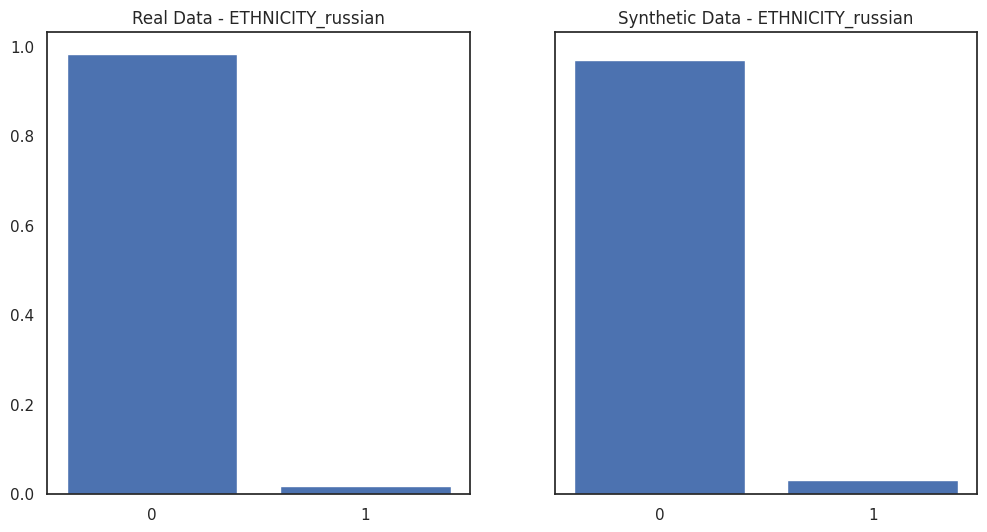

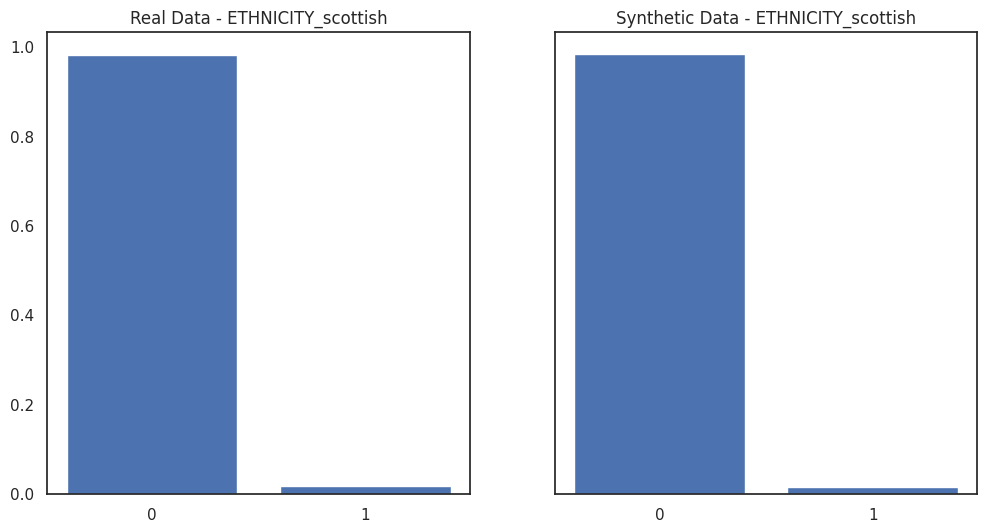

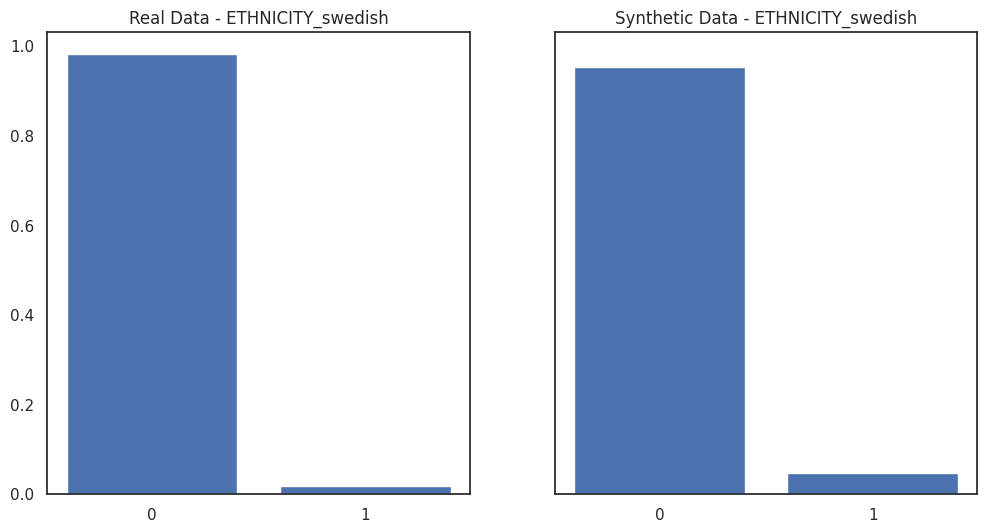

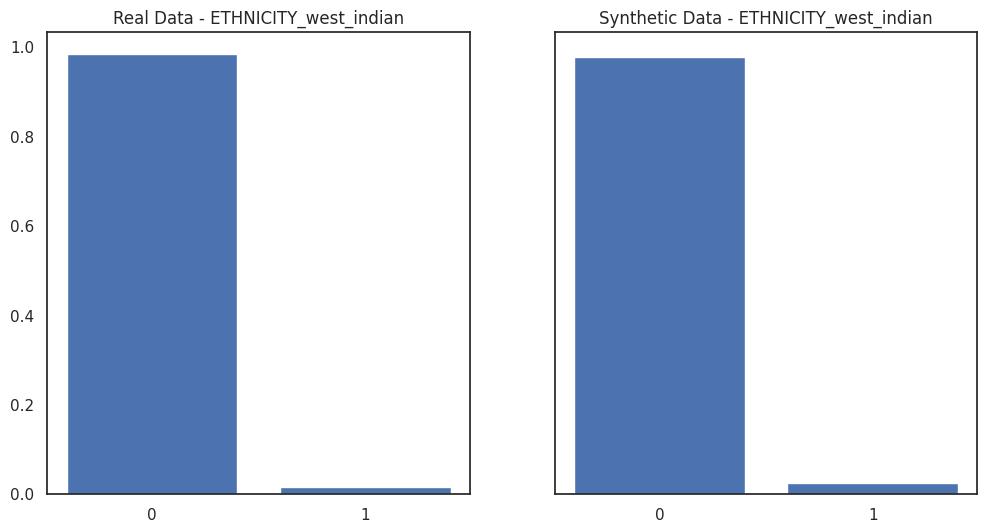

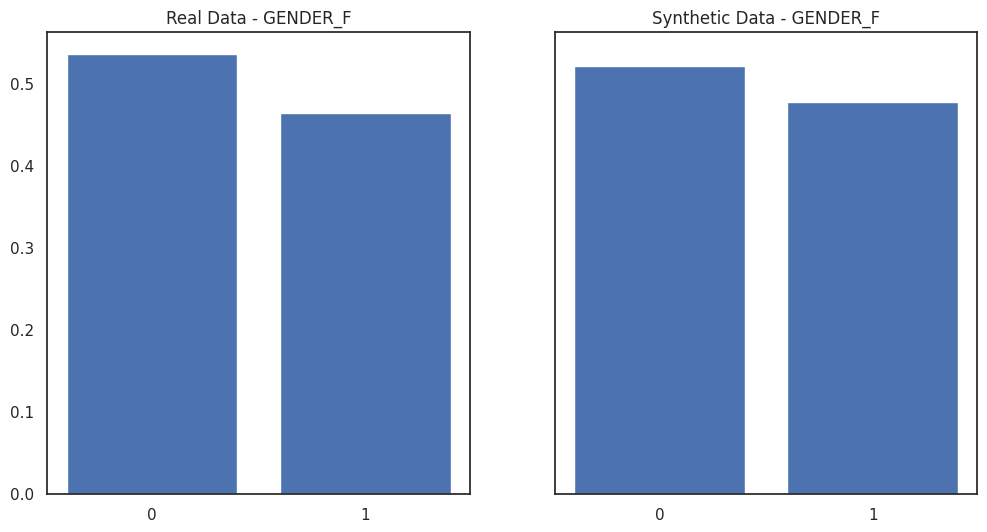

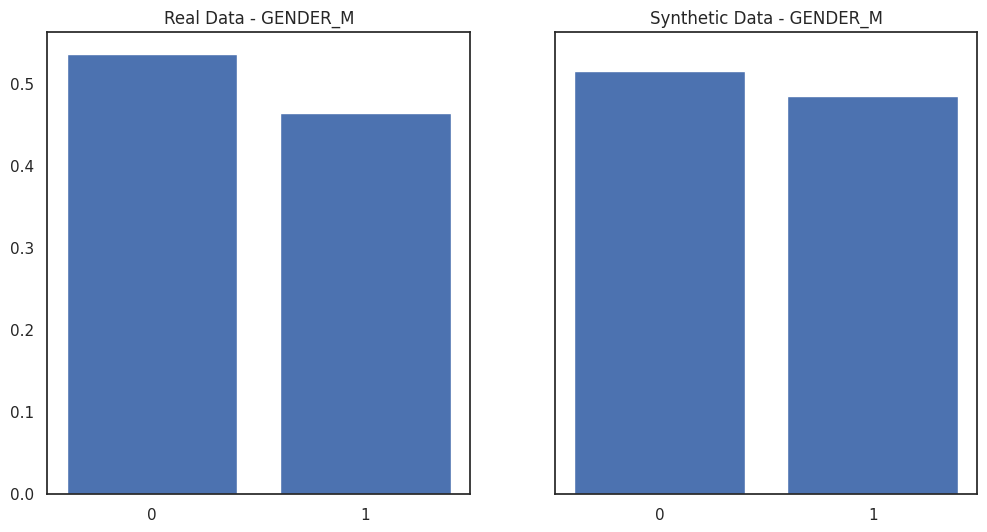

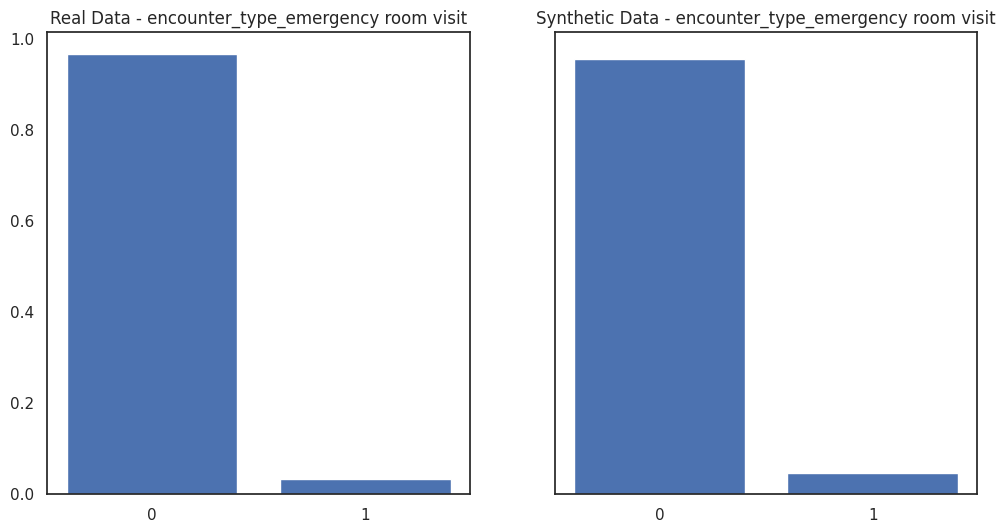

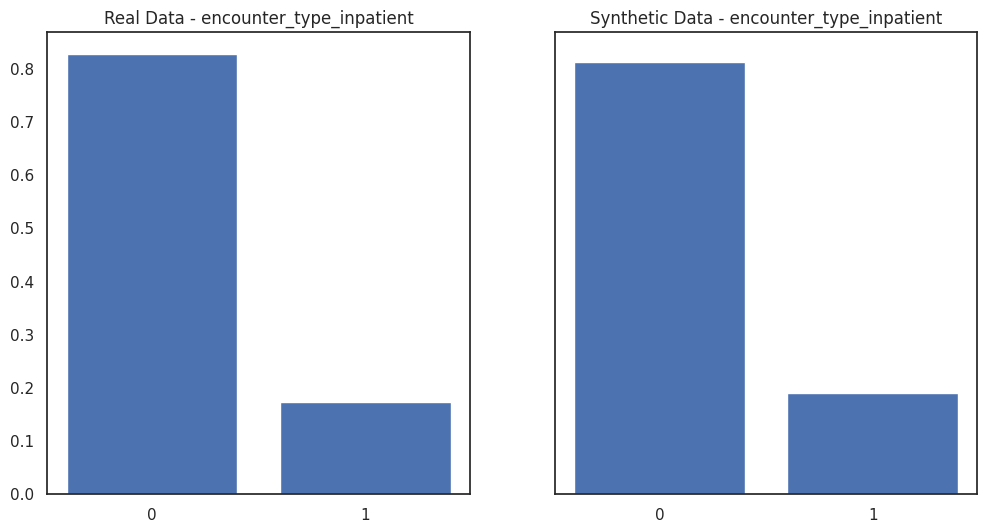

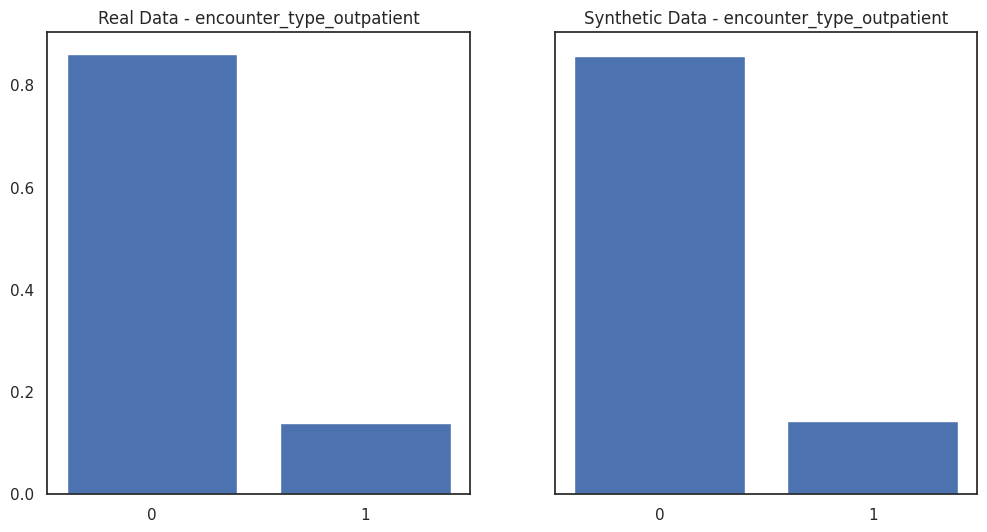

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the real and synthetic datasets
real_data = pd.read_csv('/content/real_train.csv')
synthetic_data = pd.read_csv('/content/synthetic_CTGAN_real_train1.csv')

# Define the list of continuous and binary columns as before
continuous_columns = [
    'careplan_length', 'Diastolic Blood Pressure', 'Systolic Blood Pressure', 'Body Mass Index',
    'Total Cholesterol', 'High Density Lipoprotein Cholesterol', 'Triglycerides',
    'Low Density Lipoprotein Cholesterol', 'Glucose', 'Hemoglobin A1c/Hemoglobin.total in Blood',
    'Sodium', 'Chloride', 'Potassium', 'Carbon Dioxide', 'Calcium', 'Urea Nitrogen',
    'Estimated Glomerular Filtration Rate'
]
binary_columns = [col for col in real_data.columns if col not in continuous_columns]

# Plotting distributions for continuous columns
for column in continuous_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(real_data[column], kde=True, stat="density", linewidth=0, color='blue', label='Real Data')
    sns.histplot(synthetic_data[column], kde=True, stat="density", linewidth=0, color='red', alpha=0.5, label='Synthetic Data')
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()

# Plotting bar charts for binary columns
for column in binary_columns:
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
    axs[0].bar(['0', '1'], real_data[column].value_counts(normalize=True))
    axs[0].set_title(f'Real Data - {column}')
    axs[1].bar(['0', '1'], synthetic_data[column].value_counts(normalize=True))
    axs[1].set_title(f'Synthetic Data - {column}')
    plt.show()


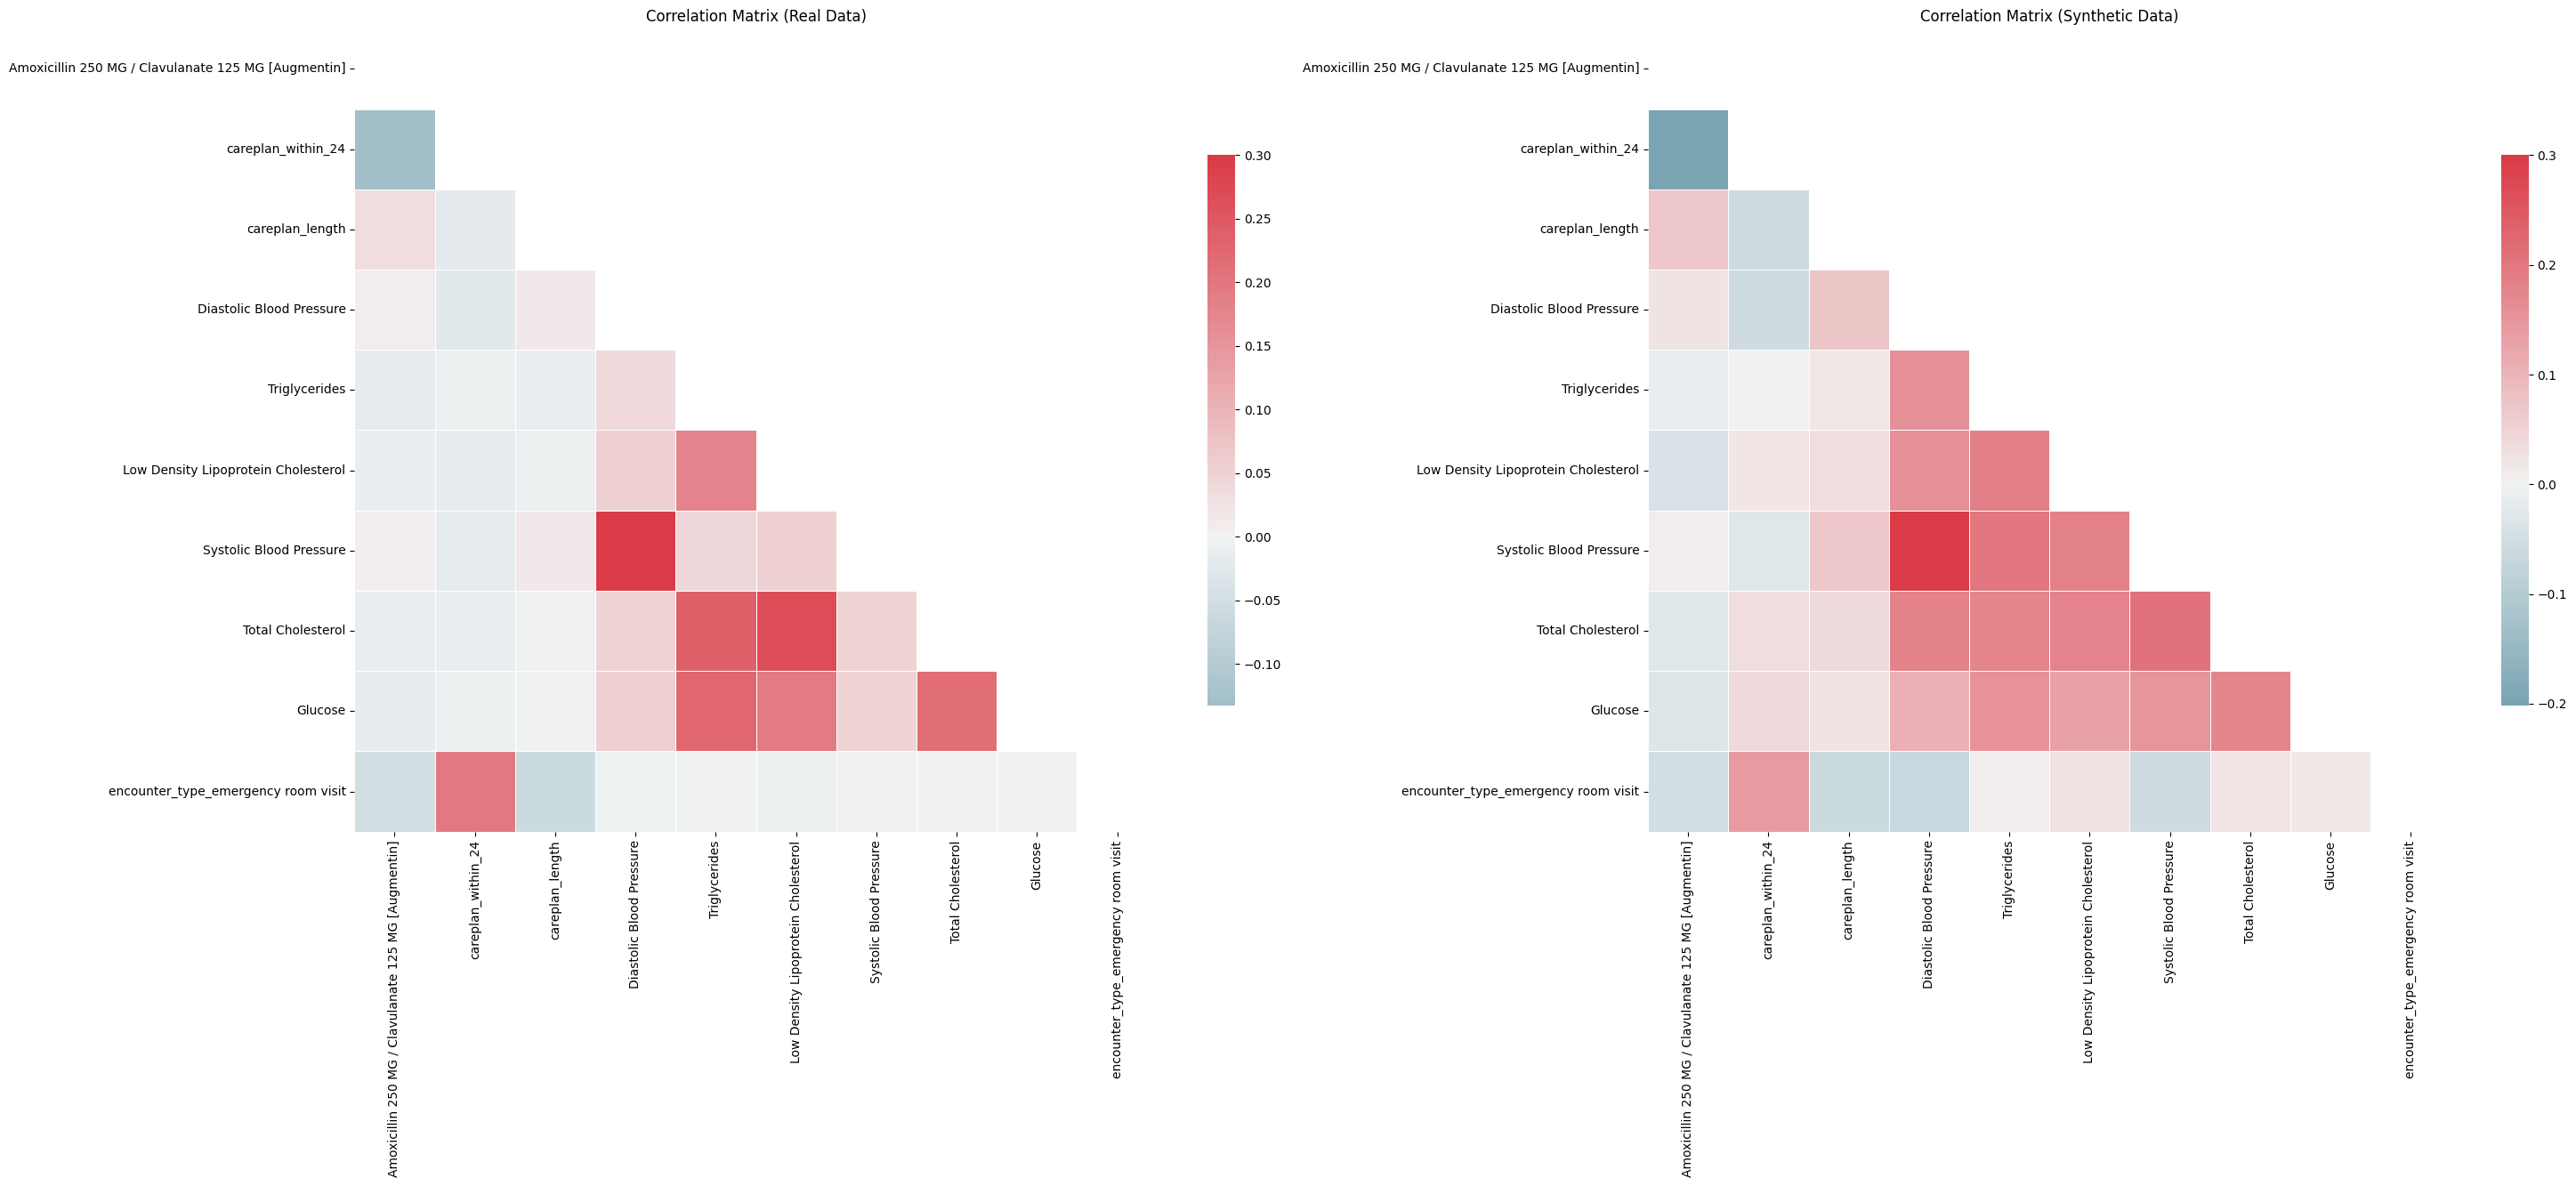

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded the datasets into `real_data` and `synthetic_data`
real_data = pd.read_csv('/content/real_train.csv')
synthetic_data = pd.read_csv('/content/synthetic_CTGAN_real_train1.csv')

# Define the top 10 features
top_features = [
    "Amoxicillin 250 MG / Clavulanate 125 MG [Augmentin]",
    "careplan_within_24",
    "careplan_length",
    "Diastolic Blood Pressure",
    "Triglycerides",
    "Low Density Lipoprotein Cholesterol",
    "Systolic Blood Pressure",
    "Total Cholesterol",
    "Glucose",
    "encounter_type_emergency room visit"
]

# Filter the datasets to include only the top 10 features
real_data_top = real_data[top_features]
synthetic_data_top = synthetic_data[top_features]

# Calculate the correlation matrices for the filtered data
real_corr_top = real_data_top.corr()
synthetic_corr_top = synthetic_data_top.corr()

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(real_corr_top, dtype=bool))

# Set up the matplotlib figure
fig, axs = plt.subplots(ncols=2, figsize=(30, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmaps with the mask and without annotations
sns.heatmap(real_corr_top, mask=mask, cmap=cmap, vmax=.3, center=0, ax=axs[0],
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)
axs[0].set_title('Correlation Matrix (Real Data)')


sns.heatmap(synthetic_corr_top, mask=mask, cmap=cmap, vmax=.3, center=0, ax=axs[1],
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)
axs[1].set_title('Correlation Matrix (Synthetic Data)')


plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


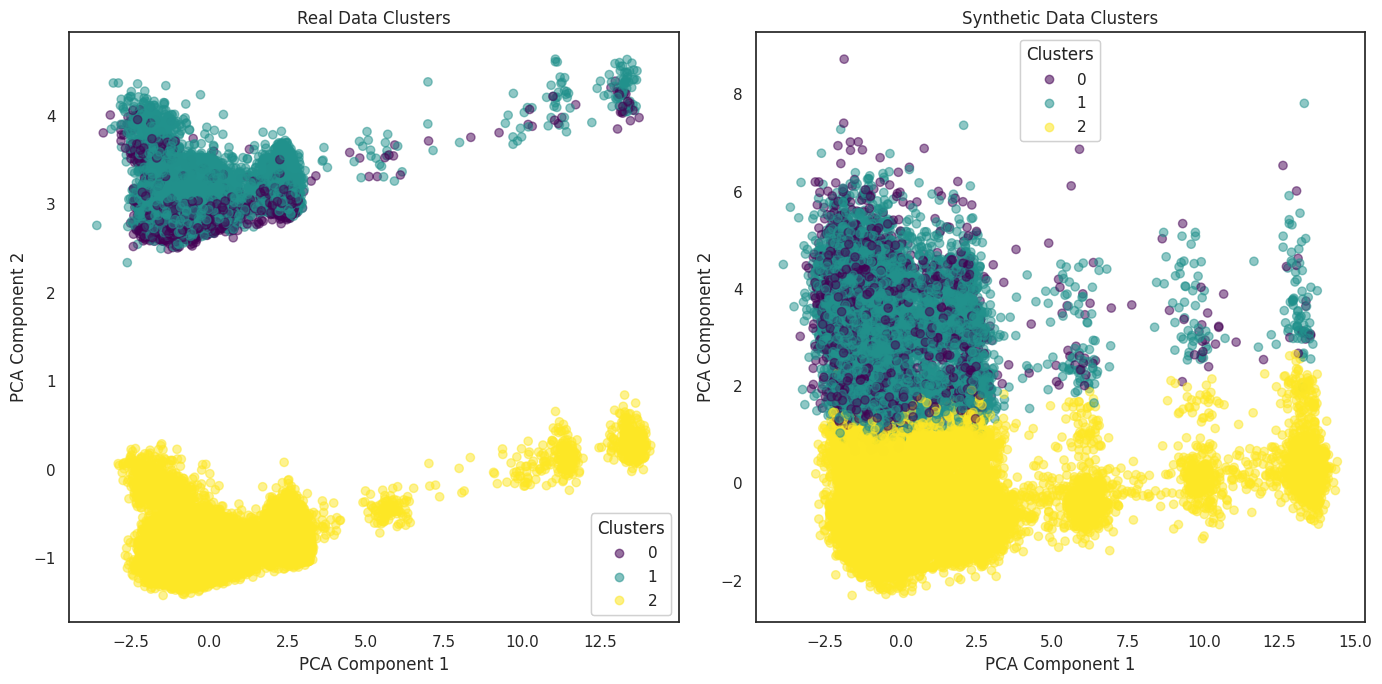

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize the data
scaler = StandardScaler()
real_data_scaled = scaler.fit_transform(real_data)
synthetic_data_scaled = scaler.transform(synthetic_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # choose the appropriate number of clusters
real_cluster_labels = kmeans.fit_predict(real_data_scaled)
synthetic_cluster_labels = kmeans.predict(synthetic_data_scaled)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
real_pca = pca.fit_transform(real_data_scaled)
synthetic_pca = pca.transform(synthetic_data_scaled)

# Plot the PCA results with cluster labels
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Real Data Scatter Plot
scatter = ax[0].scatter(real_pca[:, 0], real_pca[:, 1], c=real_cluster_labels, cmap='viridis', alpha=0.5)
ax[0].set_title('Real Data Clusters')
ax[0].set_xlabel('PCA Component 1')
ax[0].set_ylabel('PCA Component 2')
legend1 = ax[0].legend(*scatter.legend_elements(), title="Clusters")
ax[0].add_artist(legend1)

# Synthetic Data Scatter Plot
scatter = ax[1].scatter(synthetic_pca[:, 0], synthetic_pca[:, 1], c=synthetic_cluster_labels, cmap='viridis', alpha=0.5)
ax[1].set_title('Synthetic Data Clusters')
ax[1].set_xlabel('PCA Component 1')
ax[1].set_ylabel('PCA Component 2')
legend2 = ax[1].legend(*scatter.legend_elements(), title="Clusters")
ax[1].add_artist(legend2)

plt.tight_layout()
plt.show()


In [ ]:
!pip install table_evaluator

(60591, 66) (60592, 66)


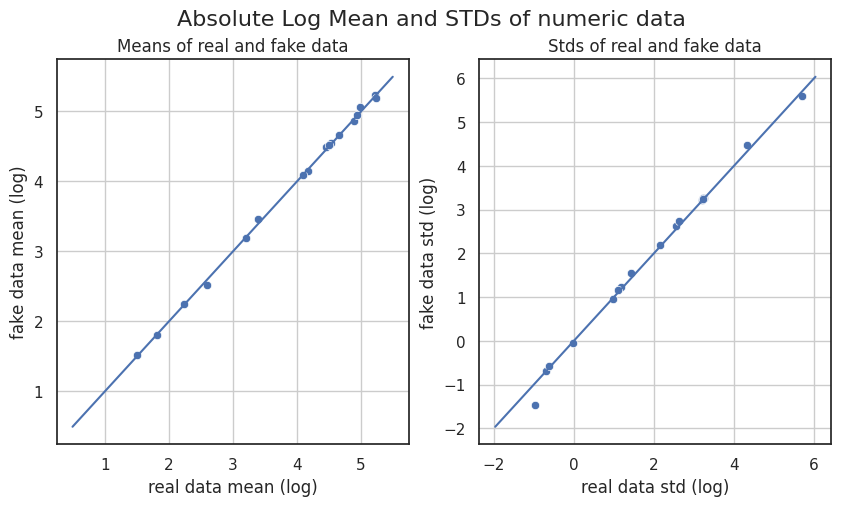

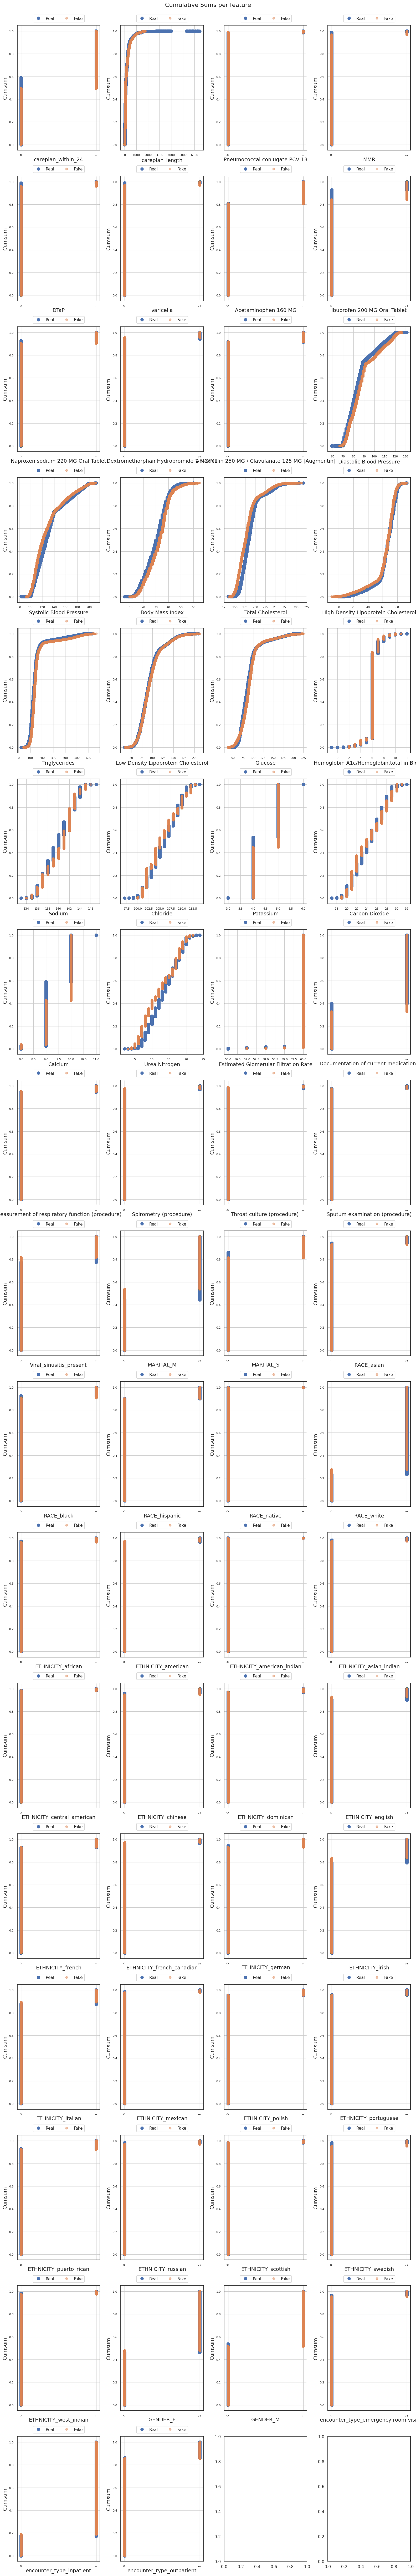

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormat

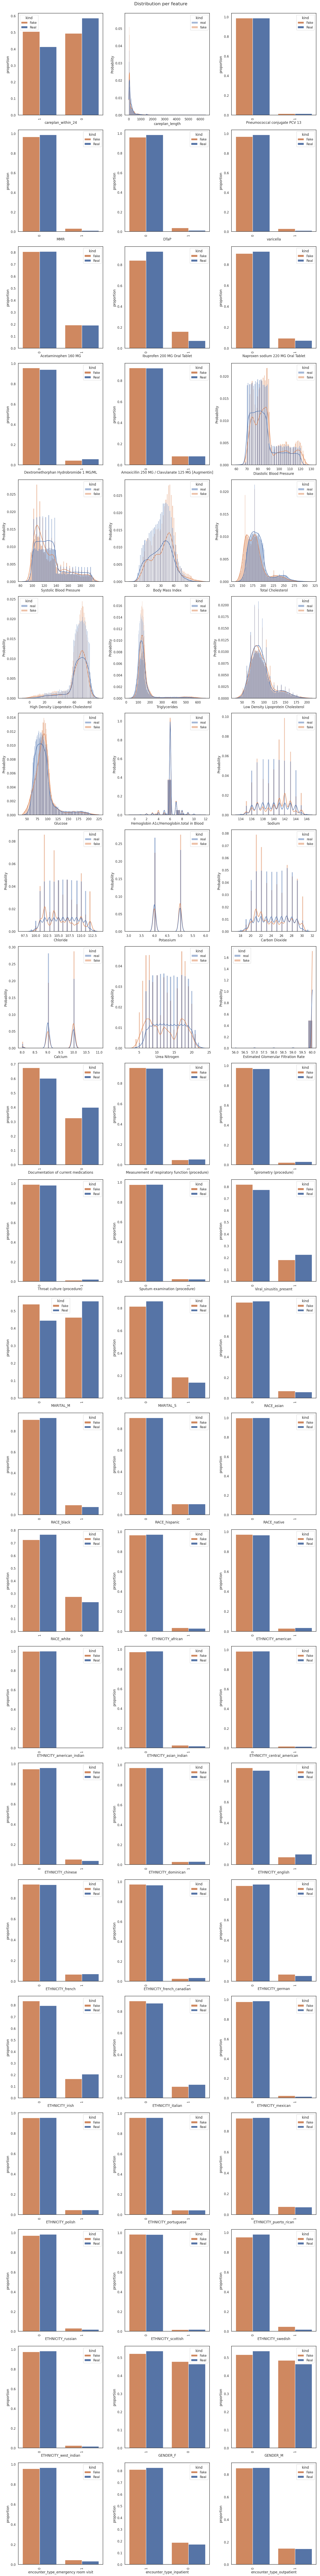

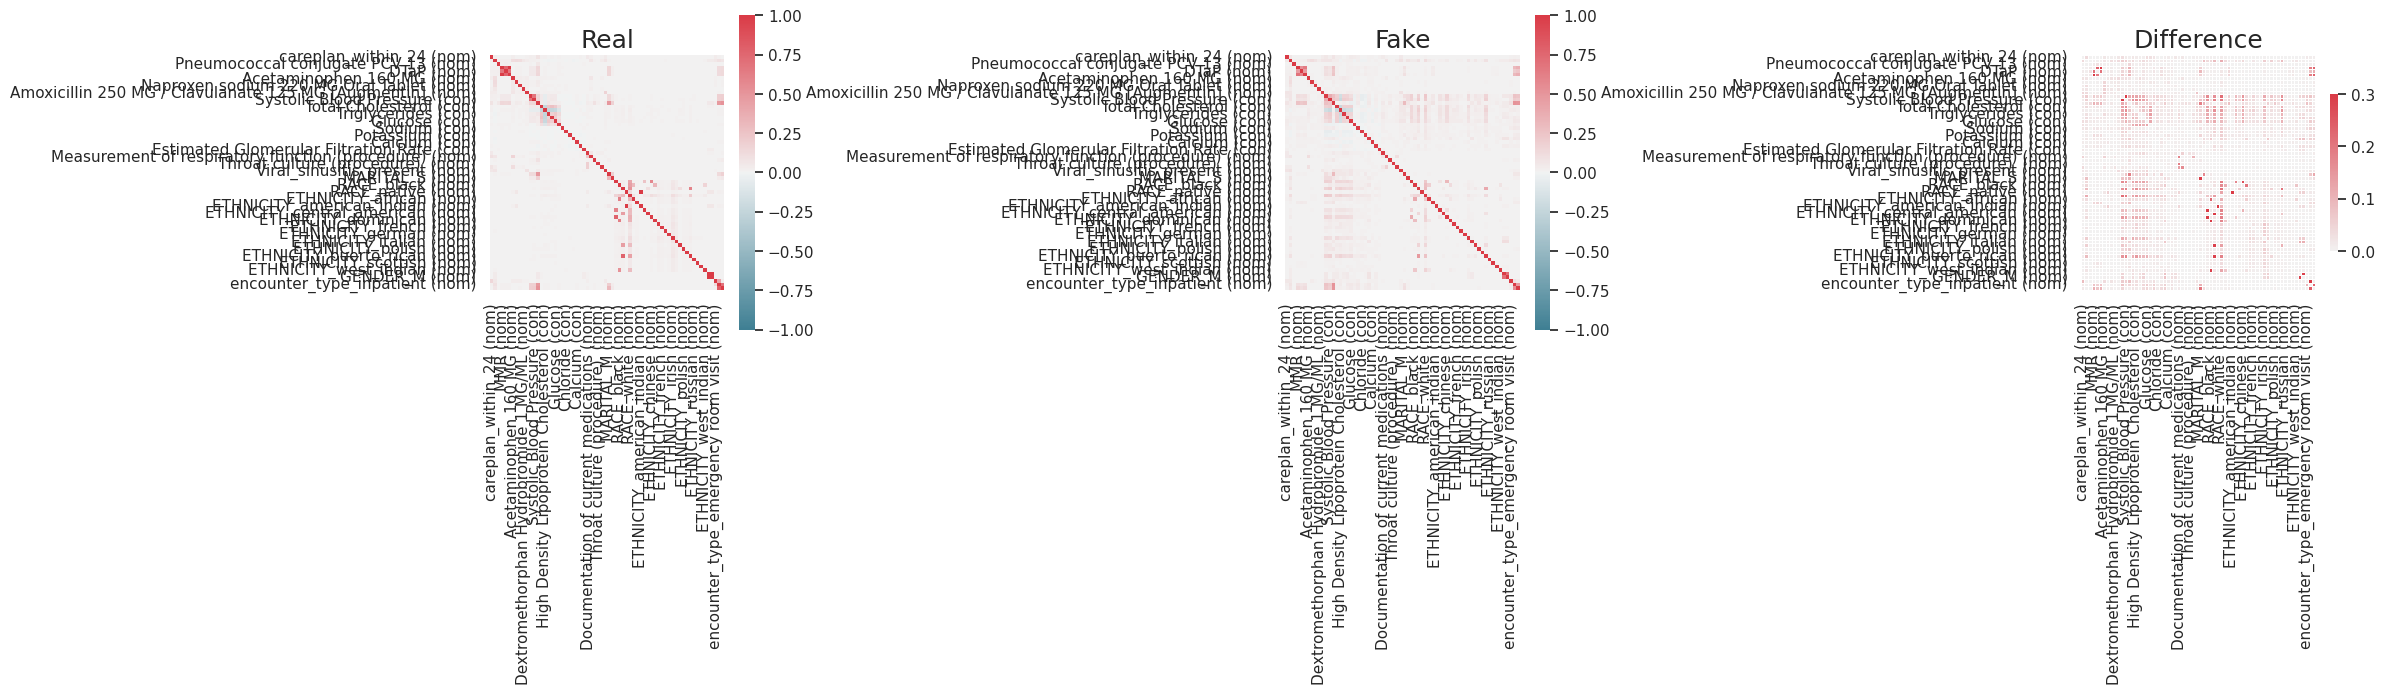

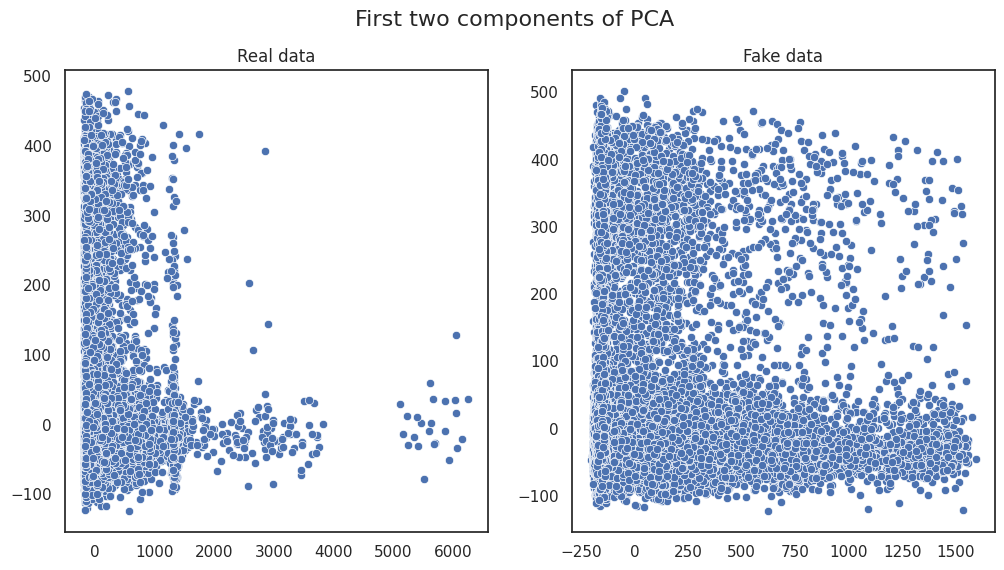

In [ ]:
from table_evaluator import load_data, TableEvaluator
print(real_data.shape, synthetic_data.shape)
table_evaluator =  TableEvaluator(real_data, synthetic_data, cat_cols= binary_columns)
table_evaluator.visual_evaluation()

['careplan_within_24', 'Pneumococcal conjugate PCV 13', 'MMR', 'DTaP', 'varicella', 'Acetaminophen 160 MG', 'Ibuprofen 200 MG Oral Tablet', 'Naproxen sodium 220 MG Oral Tablet', 'Dextromethorphan Hydrobromide 1 MG/ML', 'Amoxicillin 250 MG / Clavulanate 125 MG [Augmentin]', 'Documentation of current medications', 'Measurement of respiratory function (procedure)', 'Spirometry (procedure)', 'Throat culture (procedure) ', 'Sputum examination (procedure)', 'Viral_sinusitis_present', 'MARITAL_M', 'MARITAL_S', 'RACE_asian', 'RACE_black', 'RACE_hispanic', 'RACE_native', 'RACE_white', 'ETHNICITY_african', 'ETHNICITY_american', 'ETHNICITY_american_indian', 'ETHNICITY_asian_indian', 'ETHNICITY_central_american', 'ETHNICITY_chinese', 'ETHNICITY_dominican', 'ETHNICITY_english', 'ETHNICITY_french', 'ETHNICITY_french_canadian', 'ETHNICITY_german', 'ETHNICITY_irish', 'ETHNICITY_italian', 'ETHNICITY_mexican', 'ETHNICITY_polish', 'ETHNICITY_portuguese', 'ETHNICITY_puerto_rican', 'ETHNICITY_russian', 'ET